# E-commerce — Выявление профилей потребления

# Декомпозиция 

## Описание проекта 

**Задача:** на основании данных об истории покупок необходимо определить сегменты пользователей. Сегментация необходима заказчику для того, чтобы настроить персональные предложения для пользователей и понять их предпочтения, настроить таргет и увеличить выручку.

## План работы:
**Шаг 1. Загрузим данные и изучим общую информацию о данных**

Путь к файлу: ecom_dataset_upd.csv

Столбцы: 
`date` — дата заказа;

`customer_id` — идентификатор покупателя; 

`order_id` — идентификатор заказа;

`product` — наименование товара;

`quantity` — количество товара в заказе;

`price` — цена товара.

**Шаг 2. Подготовка данных**

Обработать пропуски при необходимости и преобразовать данные в нужные типы;

Обработать дату в нужный формат (дата, день и час совершения покупки);

Исследовать и удалить явные дубликаты;

Исследовать неявные дубликаты в комбинации для столбцов с помощью subset;

Рассмотреть распределения. Построим столбчатые гистограммы и распределения признаков;

Рассмотреть стобец `product` и извлечь категорию или подкотегорию товаров.

**Шаг 3. Проведем исследовательский анализ данных (EDA)**

Рассмотрим поведение клиентов по главным метрикам (в динамике и без):

Определим количество заказов и количество покупателей;

Рассмотрим динамику изменения выручки;

Определить среднее количество покупок на клиента;

Определить среднее количество товаров в заказе;

Определить суммарную выручку, полученную на клиента за все время;

Средний чек. Средняя сумма каждого заказа для каждого клиента;

Средний интервал времени между заказами;

Найдем наиболее популярные товары и категории товаров;

Процент клиентов, совершивших повторную покупку.

**Шаг 4. Сделаем кластеризацию клиентов**

Предположил различные варианты сегментации. Пользователи могут быть сегментированы на основе частоты покупок (регулярные клиенты, случайные покупатели). Сегментация на основе общей выручки от покупок (высокие, средние, низкие). Группировка по предпочтениям товаров (сегменты, предпочитающие определенные категории товаров)

Проведем кластеризацию с помощью алгоритма K-Means:

Стандартизировать данные.

Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков и нарисуйте дендрограмму. На основании полученного графика предположите, какое количество кластеров можно выделить.

Обучить модель кластеризации на основании алгоритма K-Means и спрогнозируйте кластеры клиентов. Определить число кластеров n на основании изучения графика.

Посмотреть на средние значения признаков для кластеров.

Составьте портрет пользователя каждого кластера. Сравненить сегменты по ключевым метрикам. Рассмотреть и описать поведение клиентов, принадлежащих к определенному кластеру. 

**Шаг 5. Проверим гипотезы:**

1) Гипотеза о частоте покупок:
Клиенты, совершающие покупки чаще, склонны тратить больше.

2) Гипотеза о предпочтениях товаров:
Клиенты, покупающие определенные категории товаров, склонны тратить больше.

3) Гипотеза о различии в кластерах (еще не придумал, но я думаю, что появится во время анализа)

**Шаг 6. Выводы и рекомендации**

Сформулировать выводы и сделать базовые рекомендации по работе с клиентами и наиболее перспективными
кластерами для повышения выручки.

По итогам исследования подготовьте презентацию.

# Содержание:

[Описание](#describe)

[1. Изучим общую информацию](#1)

[2. Проведем исследовательский анализ данных (EDA)](#2)

[3. Построение модели прогнозирования оттока клиентов](#3)  

[4. Кластеризация клиентов](#4)

[5. Проверка гипотез](#5) 

[6. Общий вывод](#6) 

Презентация: https://disk.yandex.kz/d/rXmGww8H9LOIqA

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.preprocessing import LabelEncoder
from sklearn.cluster import KMeans
from scipy import stats

<a id="1"></a>
# 1. Изучим общую информацию

**Загрузим данные и изучим общую информацию о данных**

In [2]:
#сохраним датасет в переменной data
try:
    data = pd.read_csv('https://code.s3.yandex.net/datasets/ecom_dataset_upd.csv')
except:
    data = pd.read_csv('ecom_dataset_upd.csv') 

In [3]:
data.head()

,date,customer_id,order_id,product,quantity,price
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12,...",1,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0


In [4]:
pd.options.display.max_colwidth = 100 #Увеличим количество символов, которые можно рассмотреть

In [5]:
data.tail()

,date,customer_id,order_id,product,quantity,price
7469,2020013021,63208953-a8e4-4f77-9b47-3a46e7b72eee,104002,томата (помидор) Черниченский черри № 116 сорт индетерминантный позднеспелый черный,2,38.0
7470,2020013022,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0
7471,2020013102,2c9bd08d-8c55-4e7a-9bfb-8c56ba42c6d6,106336,Подставка для обуви резиновая Attribute 80x40 см AMC080,1,354.0
7472,2020013112,cdd17932-623e-415f-a577-3b31312fd0e2,102002,Тагетис крупноцветковый рассада однолетних цветов в кассете по 6 шт,1,128.0
7473,2020013115,2e460a26-35af-453d-a369-a036e95a40e0,103225,Вешалка для блузок 41 см красный Attribute AHM781,1,104.0


In [6]:
data.info() #посмотрим сводную информацию о данных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7474 entries, 0 to 7473
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         7474 non-null   int64  
 1   customer_id  7474 non-null   object 
 2   order_id     7474 non-null   int64  
 3   product      7474 non-null   object 
 4   quantity     7474 non-null   int64  
 5   price        7474 non-null   float64
dtypes: float64(1), int64(3), object(2)
memory usage: 350.5+ KB


**Вывод:**
пропусков в данных нет, кол-во строк 7474. Во всех столбцах верный тип данных, кроме стобцов date и product и их нужно рассмотреть подробнее. 

<a id="2"></a> 
# 2. Подготовка данных

In [7]:
data.duplicated().sum() #проверим явные дубликаты 

0

Данные не содержат явные дубликаты. 

**Создадим столбец revenue**

Создадим столбец revenue с выручкой по нашим продажам

In [8]:
data['revenue'] = data['quantity'] * data['price']

**Рассмотрим date**

In [9]:
data.head()

,date,customer_id,order_id,product,quantity,price,revenue
0,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0
2,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018100100,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0


In [10]:
data['date'].max()

2020013115

Формат даты указан с точностью до часа

In [11]:
#сменим тип данных на str
data['date'] = data['date'].astype('str')

In [12]:
#сменим строки в формате 'YYYYMMDDHH' на нужный форматом с типом данных datetime 
data['date'] = pd.to_datetime(data['date'], format='%Y%m%d%H')

In [13]:
data['date'] #check

0      2018-10-01 00:00:00
1      2018-10-01 00:00:00
2      2018-10-01 00:00:00
3      2018-10-01 00:00:00
4      2018-10-01 00:00:00
               ...        
7469   2020-01-30 21:00:00
7470   2020-01-30 22:00:00
7471   2020-01-31 02:00:00
7472   2020-01-31 12:00:00
7473   2020-01-31 15:00:00
Name: date, Length: 7474, dtype: datetime64[ns]

In [14]:
data.head(10) #check

,date,customer_id,order_id,product,quantity,price,revenue
0,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0
1,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0
7,2018-10-01 08:00:00,375e0724-f033-4c76-b579-84969cf38ee2,68479,Настенная сушилка для белья Gimi Brio Super 100,1,824.0,824.0
8,2018-10-01 08:00:00,6644e5b4-9934-4863-9778-aaa125207701,68478,"Таз пластмассовый 21,0 л круглый ""Водолей"" С614, 1404056",1,269.0,269.0
9,2018-10-01 09:00:00,c971fb21-d54c-4134-938f-16b62ee86d3b,68480,Чехол для гладильной доски Colombo Persia Beige 130х50 см из хлопка 5379,1,674.0,674.0


In [15]:
#Создадим новые столбцы 'month' и 'year', и 'year_month_day' для группировки данных по месяцам и годам 
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year
data['year_month_day'] = data['date'].dt.strftime('%Y-%m-%d')
data['year_month'] = data['date'].dt.strftime('%Y-%m')
data.head(5) #check

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month
0,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Алое Вера, d12, h30",1,142.0,142.0,10,2018,2018-10-01,2018-10
1,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,"Комнатное растение в горшке Кофе Арабика, d12, h25",1,194.0,194.0,10,2018,2018-10-01,2018-10
2,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,2018-10
3,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,2018-10
4,2018-10-01,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,2018-10


In [16]:
data['date'].min()

Timestamp('2018-10-01 00:00:00')

In [17]:
data['date'].max()

Timestamp('2020-01-31 15:00:00')

In [18]:
data['date'].dt.year.unique()

array([2018, 2019, 2020])

In [19]:
data['date'].dt.month.unique()

array([10, 11, 12,  1,  2,  3,  4,  5,  6,  7,  8,  9])

Данные в date преобразованы верно. Данные с 1 октября 2018 по 31 января 2020.

**Проверка на неявные дубликаты**

In [20]:
data.shape

(7474, 11)

**Проверка правила "1 клиент = 1 заказ"**

In [21]:
#сгруппируем данные по уникальным заказам и заказам
orders_per_customer = data.groupby('order_id')['customer_id'].nunique()
#найдем уникальные заказы, количество которых больше 1 
orders_customer = orders_per_customer[orders_per_customer > 1]
#индексы заказов, где более одной даты
indexes_drop = orders_customer.index

In [22]:
#Удалим заказы, соответствующие этим индексам
data = data[~data['order_id'].isin(indexes_drop)]
data.shape

(7385, 11)

После проверки на "1 клиент = 1 заказ" удалили небольшое кол-во строк

**Проверка правила "1 заказ = 1 дата"**

In [23]:
#сгруппируем данные по заказам и уникальным датам 
dates_per_order = data.groupby('order_id')['date'].nunique()

#выбираем заказы, для которых количество уникальных дат больше 1 
multi_date_orders = dates_per_order[dates_per_order > 1]
#индексов заказов, где более одной даты
indexes_to_drop = multi_date_orders.index

In [24]:
#Удалим заказы, соответствующие этим индексам
data = data[~data['order_id'].isin(indexes_to_drop)]
data.shape

(5001, 11)

После проверки на "1 заказ = 1 дата" удалили строки с ошибками

**Проверим данные на неявные дубликаты по столбцам с помощью subset**

In [25]:
#посмортрим строки с полностью одинаковыми по характеристикам заказы, которые отличаются только датой
data[data.duplicated(subset=['order_id','customer_id', 'product', 'quantity', 'price'])] 

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month


In [26]:
#посмортрим строки, когда order_id повторяется для разных customer_id
data[data.duplicated(subset=['order_id', 'product'], keep=False)]

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month


In [27]:
data.shape #check

(5001, 11)

После проверки осталось 5001 строка

**Рассмотрим product**

In [28]:
data['product'].value_counts().head(50)

Пеларгония розебудная Red Pandora укорененный черенок                                                      59
Пеларгония розебудная Prins Nikolai укорененный черенок                                                    49
Пеларгония зональная диам. 12 см сиреневый полумахровый                                                    49
Сумка-тележка 2-х колесная Gimi Argo синяя                                                                 39
Пеларгония розебудная Mary укорененный черенок                                                             38
Пеларгония розебудная Queen Ingrid укорененный черенок                                                     29
Пеларгония розебудная Margaretha укорененный черенок                                                       27
Пеларгония зональная махровая лососевая                                                                    25
Пеларгония зональная диам. 12 см коралловая полумахровая                                                   24
Пеларгония

Рассмотрев самые популярные товары в заказах, кажется что у нас магазин хоз товаров. Самым поплурным товаром является Пеларгония разных видов(цветок) и другие растения разных видов(Петуния, Герань и тд), сумка-тележка.

In [29]:
len(data['product'].str.lower().unique())

2196

Всего в списке товаров представлено 2196 уникальных товаров

Посмотрим товары, в которых в строчках встречается 'd-', потому что такие товары являются растениями и их можно определить в одну категорию

In [30]:
data[data['product'].str.contains('d-', case=False)].head(10)

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month
2,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Радермахера d-12 см h-20 см,1,112.0,112.0,10,2018,2018-10-01,2018-10
3,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Хризолидокарпус Лутесценс d-9 см,1,179.0,179.0,10,2018,2018-10-01,2018-10
4,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Циперус Зумула d-12 см h-25 см,1,112.0,112.0,10,2018,2018-10-01,2018-10
5,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Шеффлера Лузеана d-9 см,1,164.0,164.0,10,2018,2018-10-01,2018-10
6,2018-10-01 00:00:00,ee47d746-6d2f-4d3c-9622-c31412542920,68477,Юкка нитчатая d-12 см h-25-35 см,1,134.0,134.0,10,2018,2018-10-01,2018-10
31,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,Муляж Зеленое яблоко полиуретан d-6 см,1,22.0,22.0,10,2018,2018-10-02,2018-10
32,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,Муляж Клубника 1 шт полиуретан d-6 см,1,22.0,22.0,10,2018,2018-10-02,2018-10
34,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,Муляж Красное яблоко мини полиуретан d-6 см,1,22.0,22.0,10,2018,2018-10-02,2018-10
39,2018-10-02 11:00:00,1bc8ad38-3392-4042-8cde-aa5de306c947,68494,Муляж Персики мини полиуретан d-6 см,1,22.0,22.0,10,2018,2018-10-02,2018-10
61,2018-10-02 21:00:00,29a514f5-a27e-4939-85d5-874a0c3f7a2c,68510,Суккулент Микс d-5 см,1,74.0,74.0,10,2018,2018-10-02,2018-10


In [31]:
data[data['product'].str.contains('d-', case=False)].tail(10)

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month
7381,2020-01-19 11:00:00,79e65126-3b66-4822-a1a1-d915b14070a5,103058,Примула акаулис Микс d-10 см,1,112.0,112.0,1,2020,2020-01-19,2020-01
7395,2020-01-21 20:00:00,296140bf-8b0f-4cf8-8c5e-5958ebb0bbe3,109391,Арбуз Сибирские огни раннеспелый d-7 см,1,30.0,30.0,1,2020,2020-01-21,2020-01
7399,2020-01-22 10:00:00,c246ad01-a0b5-4cca-8cdb-c5a05d637e0d,103180,Диффенбахия Камилла d-12 см,1,269.0,269.0,1,2020,2020-01-22,2020-01
7406,2020-01-22 13:00:00,4ede57e4-2842-4be6-b378-e0123f3770e7,111291,Пуансеттия d-12 см красная с розовым,1,134.0,134.0,1,2020,2020-01-22,2020-01
7415,2020-01-22 20:00:00,ce2408ad-0a9c-426a-b836-7a7253291b82,108525,Примула желтая с оранжевым в горшке d-10 см,1,127.0,127.0,1,2020,2020-01-22,2020-01
7423,2020-01-23 14:00:00,faca2263-add0-430d-b0ba-fce720fa9cf3,106858,Афеляндра скуарроса Дания d-12 см,1,547.0,547.0,1,2020,2020-01-23,2020-01
7424,2020-01-23 15:00:00,7e713736-c88d-46ec-bc4a-d6e234a3015f,110191,Муляж Зеленое яблоко полиуретан d-5 см,1,22.0,22.0,1,2020,2020-01-23,2020-01
7428,2020-01-24 09:00:00,70b30da1-c604-4726-849b-223b3775d382,110302,Нолина в цветной керамике d-7 см,1,239.0,239.0,1,2020,2020-01-24,2020-01
7468,2020-01-30 08:00:00,370ed405-57f6-4eff-ab2e-a0bacab6e982,102891,Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок,1,74.0,74.0,1,2020,2020-01-30,2020-01
7470,2020-01-30 22:00:00,d99d25f1-4017-4fcd-8d29-c580cc695a1a,107336,Дендробиум Санок Анна Грин 1 ствол d-12 см,1,869.0,869.0,1,2020,2020-01-30,2020-01


Создадим стобец category и выделим категорию товаров в него с помощью функции

In [32]:
#функция для определения категории товара
def extract_category(text):
    keywords = ['пеларгония', 'томата', 'калибрахоа', 'космея',
                'петуния', 'циперус', 'бакопа ампельная', 'фуксия', 'флокс',
                'примула', 'земля' , 'цикламен комнатный', 'петрушка', 'настурция', 'дыня']
    keywords_1 = ['растение', 'цветов', 'цветы', 'цветок', 'роза']
    keywords_2 = ['сумка-тележка', 'тележка', 'Сумка']
    keywords_3 = ['сушилка']
    keywords_4 = ['гладильн']
    keywords_5 = ['муляж']
    keywords_7 = ['коврик', 'ковер']
    keywords_8 = ['Сковорода', 'Кувшин', 'Термокружка', 'Тарелка', 'Тарелка десертная','Тарелка обеденная',
                  'кружка', 'Салатник', 'Мини-сковорода', 'Сковорода', 'Ложка', 'Нож', 'Вилка']
    keywords_9 = ['рассада']
    keywords_bathroom = ['ванной', 'корзина для белья', 'Таз', 'Таз пластмассовый 21,0', 'Таз пластмассовый',
                         'ёрш', 'таз пластмассовый', 'корыто', 'штора']
    
    #Проверяем наличие ключевых слов для рассады
    if any(keyword in text.lower() for keyword in keywords_9):
        return 'рассада'
    
    #Проверяем наличие ключевых слов для растения и цветы
    if any(keyword in text.lower() for keyword in keywords_1):
        return 'растения и цветы'
    
    #Проверяем наличие ключевых слов для сада и огорода
    if any(keyword in text.lower() for keyword in keywords):
        return 'сад и огород'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_2):
        return 'сумка и тележка'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_3):
        return 'сушилка'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_4):
        return 'гладильные доски'
    
    if any(keyword in text.lower() for keyword in keywords_bathroom):
        return 'ванная комната'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_5):
        return 'муляж'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_8):
        return 'посуда'
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_7):
        return 'ковры'
    
    #Проверяем наличие 'd-' в тексте
    if 'd-' in text:
        return 'сад и огород'

    words = text.split()
    
        #Если второе слово меньше 3 символов, возвращаем только первое слово
    if len(words) > 1 and len(words[1]) < 3:
        return words[0] 
    
    #Если не первое слово начинается с заглавной буквы, обрезаем до этой буквы
    for word in words[1:3]:
        if word[0].isupper():
            return ' '.join(words[:words.index(word)])
    
    #Если ни одно из условий не сработало, возвращаем первые три слова
    return ' '.join(words[:3])


#Применяем функцию к данным и выводим уникальные категории товаров
data['category'] = data['product'].apply(extract_category)
unique_categories = data['category'].unique()
print(unique_categories)

['растения и цветы' 'сад и огород' 'сушилка' 'ванная комната'
 'гладильные доски' 'Вешалка для брюк' 'Чехол' 'Крючок одежный 2-х'
 'Корзина мягкая пластиковая' 'сумка и тележка' 'рассада' 'муляж'
 'Щетка-сметка 3-х рядная' 'Щетка-сметка 4-х рядная' 'Сумка для тележки'
 'Тарелка обеденная' 'Вилка столовая' 'Ложка столовая' 'Ложка чайная'
 'Нож столовый' 'Ерш для туалета' 'Котел алюминиевый 70,0'
 'Набор прищепок большие' 'ковры' 'Корзина для глаженного'
 'Корзина пластиковая для' 'Подкладка под чехол' 'Набор кружек для'
 'Дозатор для мыла' 'Нож для чистки' 'Набор фужеров'
 'Мусорный контейнер в' 'Плед флисовый 100%' 'Скатерть'
 'Кувшин пластмассовый с' 'Перчатки латексные №' 'Стремянка алюминиевая'
 'Лестница-стремянка' 'Толкушка для картофеля' 'Готовая скатерть'
 'Простыня' 'Чайник эмалированный "Алые' 'Набор вешалок для' 'Банка'
 'Стяжка оконная с' 'Крючок одежный тройной'
 'Противень прямоугольный алюминиевый' 'Плечики пластмассовые (Размер'
 'Подушка декоративная флисовая' 'Полотенц

In [33]:
#переведем category в строчный шрифт
data['category'] = data['category'].str.lower()

Почему-то не для всех товаров в категории 'посуда' сработала функция, поэтому исправим это с помощью другой функции 

In [34]:
def extract_category(text):
    keywords_tableware = ['cковорода', 'кастрюля' 'кувшин', 'термокружка', 'тарелка', 'тарелка десертная', 
                          'чайник','тарелка обеденная', 'кружка', 'cалатник ', 'мини-сковорода', 'ложка',
                          'нож', 'вилка', 'стакан']
    
    keywords = ['вешалка', 'плечики']
    
    key = ['чехол']
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in keywords_tableware):
        return 'посуда'
    
    if any(keyword in text.lower() for keyword in keywords):
        return 'вешалки'
    
    if any(keyword in text.lower() for keyword in key):
        return 'чехол'

    #Если ни одно из условий не сработало, возвращаем первые три слова
    return text


#Применяем функцию к данным и выводим уникальные категории товаров
data['category'] = data['category'].apply(extract_category)
unique_categories = data['category'].unique()
print(unique_categories)

['растения и цветы' 'сад и огород' 'сушилка' 'ванная комната'
 'гладильные доски' 'вешалки' 'чехол' 'крючок одежный 2-х'
 'корзина мягкая пластиковая' 'сумка и тележка' 'рассада' 'муляж'
 'щетка-сметка 3-х рядная' 'щетка-сметка 4-х рядная' 'сумка для тележки'
 'посуда' 'ерш для туалета' 'котел алюминиевый 70,0'
 'набор прищепок большие' 'ковры' 'корзина для глаженного'
 'корзина пластиковая для' 'набор кружек для' 'дозатор для мыла'
 'набор фужеров' 'мусорный контейнер в' 'плед флисовый 100%' 'скатерть'
 'кувшин пластмассовый с' 'перчатки латексные №' 'стремянка алюминиевая'
 'лестница-стремянка' 'толкушка для картофеля' 'готовая скатерть'
 'простыня' 'набор вешалок для' 'банка' 'стяжка оконная с'
 'крючок одежный тройной' 'противень прямоугольный алюминиевый'
 'подушка декоративная флисовая' 'полотенце кухонное'
 'петля приварная гаражная' 'стеклянная крышка для' 'салфетка' 'миксер'
 'кофр для хранения' 'стиральный биопорошок' 'чистящий крем для'
 'щетка для смахивания' 'стремянки' 'с

Исправим некоторые отдельные категории товаров, которых очень много в наших данных

In [35]:
data.loc[data['category'] == 'сковорода', 'category'] = 'посуда'
data.loc[data['category'] == 'сумка для тележки', 'category'] = 'сумка и тележка'
data.loc[data['category'] == 'салатник', 'category'] = 'посуда'
data.loc[data['category'] == 'огурец', 'category'] = 'сад и огород'
data.loc[data['category'] == 'лестница-стремянка', 'category'] = 'стремянки'
data.loc[data['category'] == 'стремянка', 'category'] = 'стремянки'

In [36]:
#топ-20 категорий товаров  
data['category'].value_counts().head(20)

сад и огород        1509
рассада              582
сумка и тележка      348
сушилка              288
растения и цветы     285
ванная комната       244
гладильные доски     204
посуда               203
муляж                159
ковры                113
чехол                 55
вешалки               53
стремянки             34
полки                 23
скатерть              18
декабрист             16
банка                 13
окномойка             10
салфетка               9
подвесное кашпо        7
Name: category, dtype: int64

In [37]:
#кол-во уникальных категорий 
len(data['category'].unique())

453

Получилось 453 категории товаров вместо 2196 названия уникального товара. Набольшая по количеству товаров категория: сад и огород(расстения,цветы и ид)            - 1509;
рассада - 582;
cумка и тележка          - 348;
сушилка                  - 288;
растения и цветы     - 285;
ванная комната       - 244;
гладильные доски         - 204;
посуда - 203;
муляж                    - 159;
ковры                    - 113.

453 категория - слишком много, чтобы как-то использовать это, поэтому попробуем сократить количество категорий. Оставим топ-категории без изменений, а остальным оставим только 1 слово

In [38]:
top_categories = data['category'].value_counts().head(20).index.tolist()

#Создаем новый столбец category_2 и присвоим значения на основе списка топ-категорий, а остальным оставим 1 слово
data['category_2'] = data['category'].apply(lambda x: x if x in top_categories else x.split()[0])
len(data['category_2'].unique())

289

In [39]:
#Топ-10 категорий товаров 
data['category_2'].value_counts().head(10)

сад и огород        1509
рассада              582
сумка и тележка      348
сушилка              288
растения и цветы     285
ванная комната       244
гладильные доски     204
посуда               203
муляж                159
ковры                113
Name: category_2, dtype: int64

Получилось 289 категорий товаров, но это все еще много

Исправим некоторые отдельные категории товаров, которых очень много в наших данных

In [40]:
data.loc[data['category_2'] == 'стремянка', 'category_2'] = 'стремянки'
data.loc[data['category_2'] == 'стремянка-табурет', 'category_2'] = 'стремянки'
data.loc[data['category_2'] == 'этажерка', 'category_2'] = 'стремянки'
data.loc[data['category_2'] == 'щетка-сметка', 'category_2'] = 'щетка'
data.loc[data['category_2'] == 'щётка', 'category_2'] = 'щетка'
data.loc[data['category_2'] == 'декабрист', 'category_2'] = 'сад и огород'
data.loc[data['category_2'] == 'ковёр', 'category_2'] = 'ковры'
data.loc[data['category_2'] == 'сумка', 'category_2'] = 'сумка и тележка'

In [41]:
#data[data['product'].str.contains('декабрист', case=False)].head(50)

Также с помощью другой функции добавим в наши категории новые товары

In [42]:
def extract_category(text):
    tableware = ['посуда', 'масленка', 'терка', 'лопатка', 'салфетница','стакан', 'овощечистка','измельчитель',
                 'мантоварка', 'картофелемялка', 'термостакан', 'противень','рыбочистка', 'овощеварка',
                 'измерительный', 'ковш', 'кипятильник', 'пьезозажигалка', 'соковыжималка','бидон', 'блюдо',
                 'миска', 'термос', 'просеиватель', 'кастрюля', 'блюдце', 'бульонница','хлебница', 'орехоколка',
                 'скалка', 'венчик', 'сито',  'овсянница', 'тортница','соковарка', 'сковорода', 'скатерть', 
                 'сахарница', 'половник', 'чайный', 'кухонное', 'электроштопор', 'разделочная', 'толкушка']
    
    bath = ['мыло-скраб','ополаскиватель','жидкое', 'мыло', 'халат','скребок','ароматизированное','бальзам',
            'ополаскиватель','вантуз','махровое', 'прищепки', 'утюг', 'таз','щетка', 'пена', 'зубная',
            'ерш','порошок', 'швабра',  'ванна', 'тряпка', 'полотенце', 'окномойка', 'пылесос', 
            'перчатки', 'фен', 'дозатор', 'кондиционер'] 
    
    key = ['пододеяльник', 'двуспальное','наматрацник','покрывало', 'одеяло', 'мыльница', 'подголовник',
           'простынь','простыня', 'плед', 'подушка', 'наволочка', 'наматрасник']
    
    
    #Проверяем наличие ключевых слов для 
    if any(keyword in text.lower() for keyword in tableware):
        return 'кухня и посуда'
    
    if any(keyword in text.lower() for keyword in bath):
        return 'ванная комната'
    
    if any(keyword in text.lower() for keyword in key):
        return 'спальня'

    #Если ни одно из условий не сработало, возвращаем первые три слова
    return text

#Применяем функцию к данным и выводим уникальные категории товаров
data['category_2'] = data['category_2'].apply(extract_category)
unique_categories = data['category_2'].unique()
print(unique_categories)

['растения и цветы' 'сад и огород' 'сушилка' 'ванная комната'
 'гладильные доски' 'вешалки' 'чехол' 'крючок' 'корзина' 'сумка и тележка'
 'рассада' 'муляж' 'кухня и посуда' 'котел' 'набор' 'ковры' 'мусорный'
 'спальня' 'кувшин' 'стремянки' 'готовая' 'банка' 'стяжка' 'петля'
 'стеклянная' 'салфетка' 'миксер' 'кофр' 'стиральный' 'чистящий'
 'светильник' 'кориандр' 'подрукавник' 'афеляндра' 'сверло-фреза,'
 'контейнер' 'карниз' 'веник' 'ящик' 'ведро' 'бегония' 'хризантема'
 'сервировочная' 'шнур' 'урна' 'сиденье' 'сметка' 'линейка,' 'насадка'
 'средство' 'бензин' 'паста' 'держатель' 'пробка' 'лоток' 'губка'
 'антижир' 'универсальное' 'ролик' 'сменный' 'термометр' 'бархатцы'
 'морковь' 'кисточка' 'комод' 'алиссум' 'гвоздика' 'годеция' 'календула'
 'капуста' 'кореопсис' 'лапчатка' 'цинерария' 'эшшольция' 'жестяная'
 'рассекатель' 'сетка' 'весы' 'комплект' 'подставка' 'ручка-скоба' 'пресс'
 'гиностемма' 'ель' 'кипарисовик' 'новогоднее' 'защитный'
 'многофункциональный' 'кольца' 'фоторамка' '

In [43]:
len(data['category_2'].unique())

205

Получилось 205 категорий, но это все еще много

In [44]:
top_categories = data['category_2'].value_counts().head(10).index.tolist()
#Создаем новый столбец category_3 и присваиваем значения на основе списка топ-категорий,а остальным 'Нет категории'
data['category_3'] = data['category_2'].apply(lambda x: x if x in top_categories else 'нет категории')
len(data['category_3'].unique())

11

In [45]:
data['category_3'].value_counts()

сад и огород        1525
нет категории        807
рассада              582
ванная комната       351
сумка и тележка      349
кухня и посуда       335
сушилка              288
растения и цветы     285
гладильные доски     204
муляж                159
ковры                116
Name: category_3, dtype: int64

Сократили количество категорий до 11. Из данных видно, что товары по категориям распределены не совсем равномерно и большую часть товаров из хозяйственного магазина занимают товары, которые связаны с садом и огородом, а также рассадой.

**Рассмотрим распределения**


In [46]:
data.describe()

,order_id,quantity,price,revenue,month,year
count,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000,5001.000000
mean,57136.315937,2.558688,540.787659,854.635156,6.715257,2018.833033
std,32706.836046,17.031835,995.310081,9687.472861,3.648137,0.496706
min,12624.000000,1.000000,9.000000,9.000000,1.000000,2018.000000
25%,14814.000000,1.000000,90.000000,120.000000,4.000000,2019.000000
50%,69275.000000,1.000000,150.000000,194.000000,6.000000,2019.000000
75%,72078.000000,1.000000,539.000000,734.000000,10.000000,2019.000000
max,112789.000000,1000.000000,14917.000000,675000.000000,12.000000,2020.000000


In [47]:
data[data['price'] == 14917]

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month,category,category_2,category_3
5992,2019-07-29 17:00:00,0d87f4ae-465a-4fac-81e6-5d629761783e,72139,Сушилка уличная Leifheit 85210 LINOMATIC V 400 40 м 175х237х237 см зеленая,1,14917.0,14917.0,7,2019,2019-07-29,2019-07,сушилка,сушилка,сушилка


Все верно, она столько стоит

In [48]:
data[data['quantity'] == 1000]

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month,category,category_2,category_3
5456,2019-06-18 15:00:00,312e9a3e-5fca-43ff-a6a1-892d2b2d5ba6,71743,"Вантуз с деревянной ручкой d14 см красный, Burstenmann, 0522/0000",1000,675.0,675000.0,6,2019,2019-06-18,2019-06,вантуз,ванная комната,ванная комната


Все верно

**Построим столбчатые гистограммы и распределения признаков**

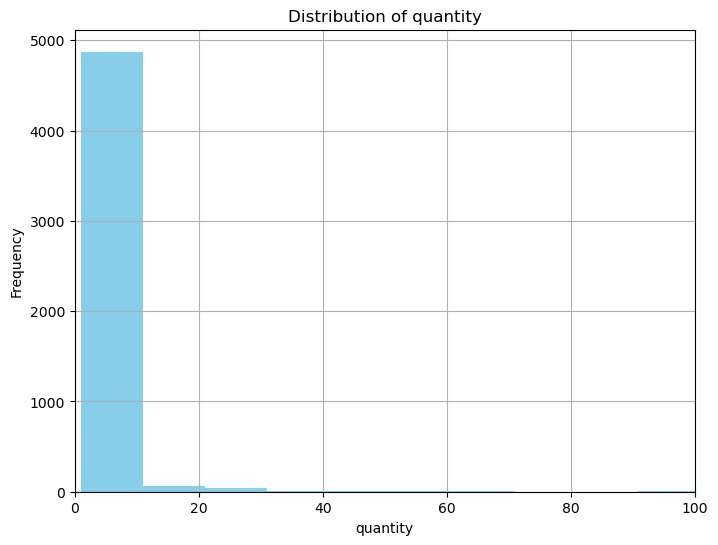

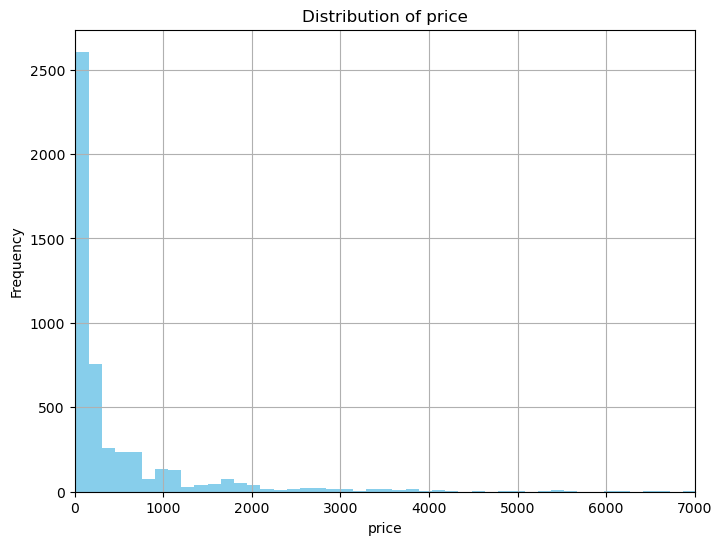

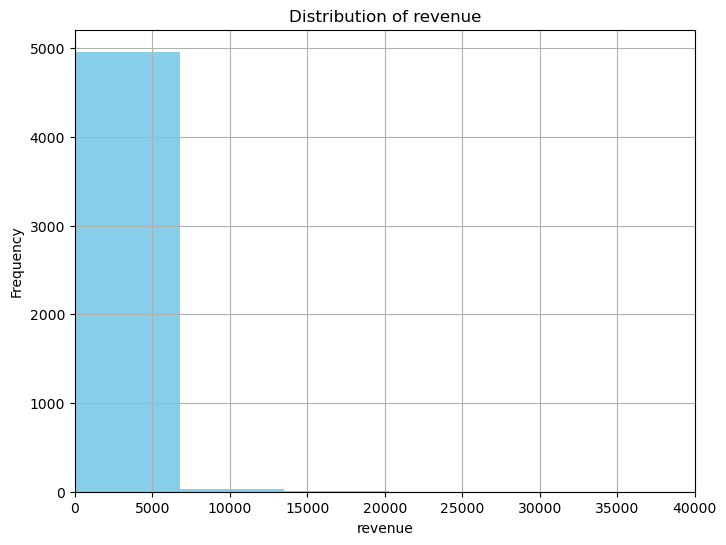

In [49]:
#Функция для построения гистограммы
def plot_histogram(data, column_name, xlim=None):
    plt.figure(figsize=(8, 6))
    plt.hist(data[column_name], bins=100, color='skyblue')
    plt.title(f'Distribution of {column_name}')
    plt.xlabel(column_name)
    plt.ylabel('Frequency')
    plt.grid(True)
    if xlim:
        plt.xlim(xlim)
    plt.show()

#гистограммы для количества товаров (quantity)
plot_histogram(data, 'quantity', (0, 100))  #изменим значения xlim 

#гистограммы для цен (price)
plot_histogram(data, 'price', (0, 7000))  #изменим значения xlim 

#гистограмма для выручки (revenue)
plot_histogram(data, 'revenue', (0, 40000))  #изменим значения xlim 

**Вывод:**
максимальное кол-во товара при покупке составило 1000 штук. Минимальное кол-во равно 1 шт (нет ошибок или возвратов). Максимальная цена товара составляет 14917. Медианная цена 1 товара составляет 150, а средняя цена 1 товара отличается сильно и составляет 530.

В датасете представлены данные  с 1 октября 2018 по 31 января 2020.

Всего в датасете представлено 2196 уникальных товаров и по товарному ассортименту это похоже на хозяйственный магазин. После проведения категоризации у нас получилось 11 категорий товаров.

Наиболее популярные товары:
Пеларгония розебудная Red Pandora укорененный черенок                 67;
Пеларгония розебудная Prins Nikolai укорененный черенок               58;
Пеларгония зональная диам. 12 см сиреневый полумахровый               53;
Сумка-тележка 2-х колесная Gimi Argo синяя                            47;
Пеларгония розебудная Mary укорененный черенок                        40;
Пеларгония розебудная Margaretha укорененный черенок                  31;
Пеларгония розебудная Queen Ingrid укорененный черенок                31;
Пеларгония зональная Ринго Вайт d-7 см h-10 см укорененный черенок    25;
Пеларгония зональная махровая лососевая                               25;
Пеларгония зональная диам. 12 см коралловая полумахровая              24.

Наиболее популярные категории товаров:
сад и огород       1699;
Нет категории       929;
рассада             674;
ванная комната      389;
сумка и тележка     382;
кухня и посуда      363;
сушилка             319.

Данные не содержали явные дубликаты. Провели отчистку данных по принципу "1 клиент = 1 заказ" и "1 заказ = 1 дата" и удалили строки с ошибками. После проверки и удаления осталась 5001 строка. Также обработали столбцы date и преобразовали в нужный тип данные.

<a id="3"></a>
# 3. Проведем исследовательский анализ данных (EDA)

**Определим количество заказов и количество покупателей**

количество уникальных заказов

In [50]:
len(data['order_id'].unique())

3236

количество уникальных покупателей

In [51]:
len(data['customer_id'].unique())

2185

**Рассмотрим динамику изменения выручки**

Рассмотрим динамику изменения выручки за все время по дням

In [52]:
data = data[data['revenue'] < 600000]

удалим выброс с одни значением, где выручка равна больше 600000

In [53]:
#выручка по дням
revenue_by_year_month_day = data.groupby('year_month_day')['revenue'].sum()
revenue_by_year_month_day

year_month_day
2018-10-01     8261.0
2018-10-02    16746.0
2018-10-03     7275.0
2018-10-04    23761.0
2018-10-05     4036.0
               ...   
2020-01-27     2361.0
2020-01-28     6057.0
2020-01-29     5471.0
2020-01-30     1019.0
2020-01-31      586.0
Name: revenue, Length: 482, dtype: float64

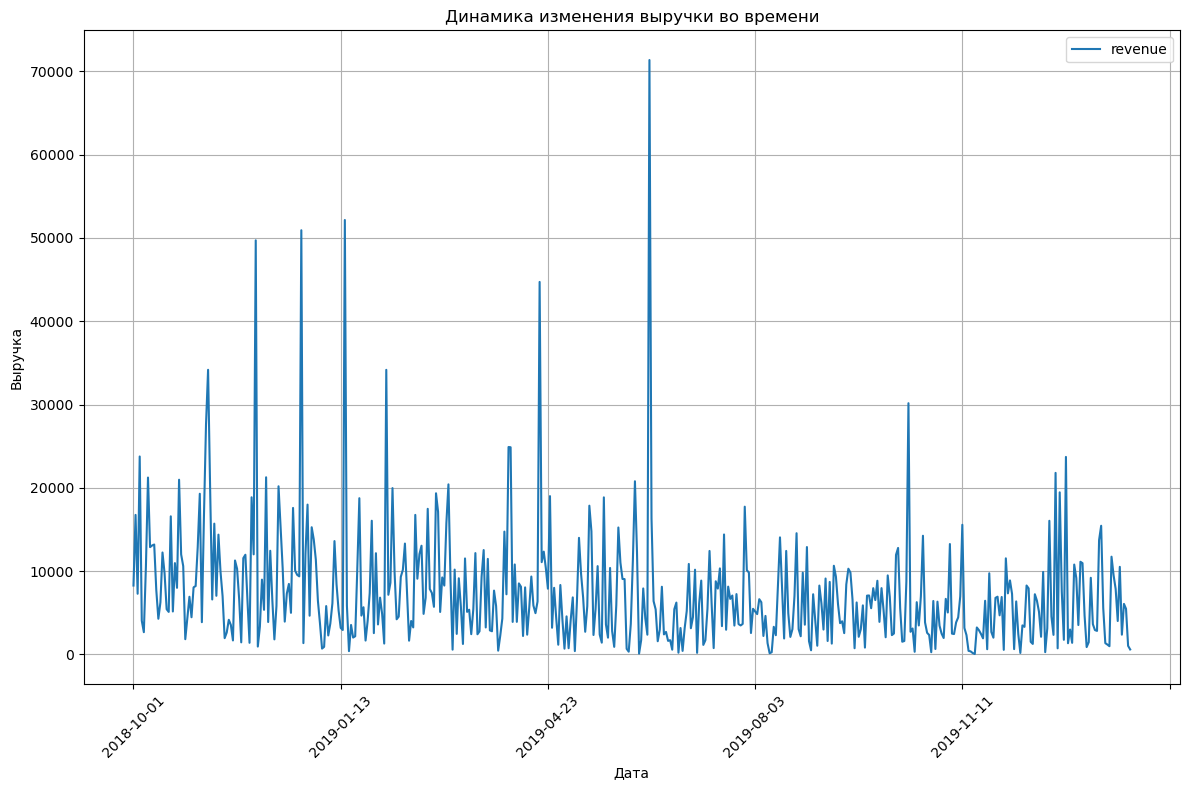

In [54]:
#Построим график динамики изменения выручки по времени
plt.figure(figsize=(12, 8))
revenue_by_year_month_day.plot(kind='line')
plt.title('Динамика изменения выручки во времени')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)  #Поворот дат на оси X 
#plt.ylim(top=100000) #Ограничение по оси y
plt.tight_layout()
plt.legend()
plt.show()

При рассмотрении выручки по дням, в некоторые дни в данных встречаются выбросы от 30 до 70 тыс., поэтому посмотрим изменение выручки по месяцам.

In [55]:
#Выручка по месяцам
revenue_by_year_month = data.groupby('year_month')['revenue'].sum()

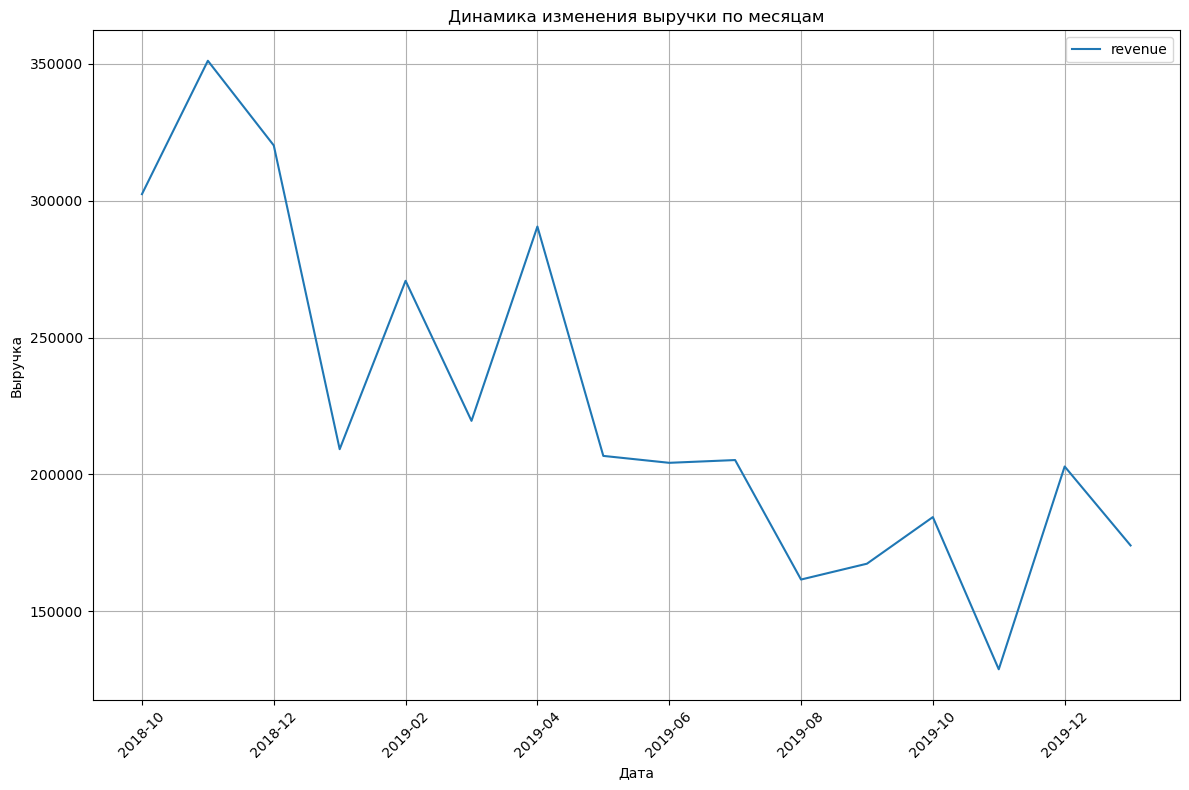

In [56]:
#Построим график динамики изменения выручки по времени
plt.figure(figsize=(12, 8))
revenue_by_year_month.plot(kind='line')
plt.title('Динамика изменения выручки по месяцам')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.xticks(rotation=45)  #Поворот дат на оси X 
plt.tight_layout()
plt.legend()
plt.show()

График изменения выручки по месяцам менее шумный и тренд просматривается отрицательный. Пик в ноябре 18 года с постоянным снижением 

**Рассмотрим изменение скользящего среднего выручки**

Рассмотрим скользящее среднее с окном в 7 дней, чтобы увидеть общий тренд изменения выручки без выбросов 

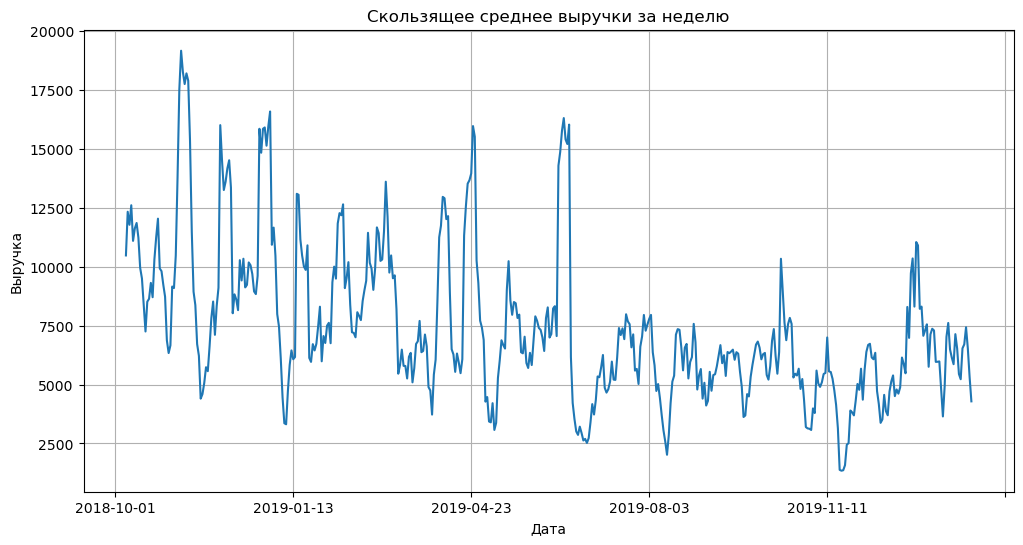

In [57]:
revenue_by_year_month_day_7 = revenue_by_year_month_day.rolling(window=7).mean()#скользящее среднее по 7 дням

plt.figure(figsize=(12, 6))
revenue_by_year_month_day_7.plot(kind='line')
plt.title('Скользящее среднее выручки за неделю')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

Рассмотрим скользящее среднее с окном в 30 дней

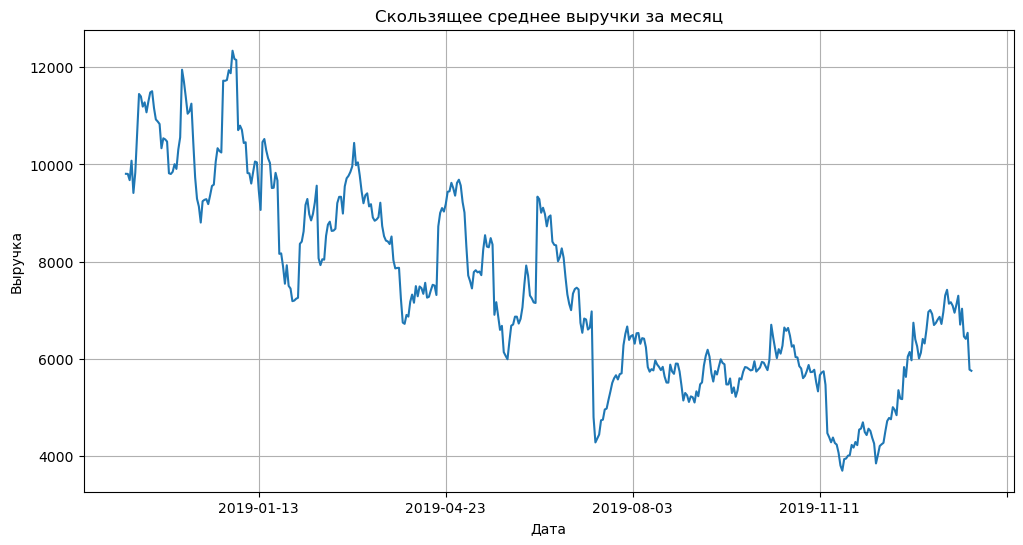

In [58]:
revenue_by_year_month_day_30 = revenue_by_year_month_day.rolling(window=30).mean()#скользящее среднее по 30 дням

plt.figure(figsize=(12, 6))
revenue_by_year_month_day_30.plot(kind='line')
plt.title('Скользящее среднее выручки за месяц')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

График скользящего среднего за 7 и 30 дней показывает значительные колебания выручки, с заметными пиками и провалами. Самый высокий пик приходится на начало 2019 года, после чего выручка в целом снижается.

Также рассмотрим скользящее среднее выручки за все время

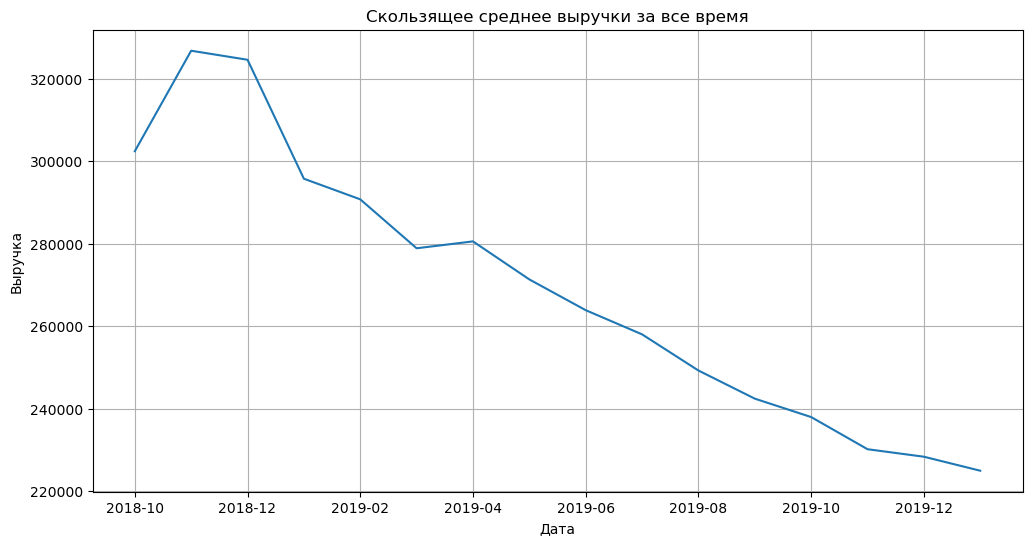

In [59]:
revenue_by_year_month_ = revenue_by_year_month.expanding().mean()

plt.figure(figsize=(12, 6))
revenue_by_year_month_.plot(kind='line')
plt.title('Скользящее среднее выручки за все время')
plt.xlabel('Дата')
plt.ylabel('Выручка')
plt.grid(True)
plt.show()

Скользящее среднее выручки за все время подтверждает отрицательный тренд на снижение выручки и ее пиком в конце 2018 года

**Определим суммарную выручку, полученную на клиента за все время**

In [60]:
total_revenue_per_customer = data.groupby('customer_id')['revenue'].sum().reset_index()
total_revenue_per_customer.sort_values(ascending=False, by='revenue').head(10)

,customer_id,revenue
1706,c971fb21-d54c-4134-938f-16b62ee86d3b,152028.0
649,4d93d3f6-8b24-403b-a74b-f5173e40d7db,53728.0
727,58a4c3cc-504f-43ea-a74a-bae19e665552,53232.0
171,146cd9bf-a95c-4afb-915b-5f6684b17444,49432.0
612,498f12a4-6a62-4725-8516-cf5dc9ab8a3a,41900.0
1203,8fba3604-ef57-4b9f-b2fe-3402fa8825c8,33680.0
868,6987e6d6-a63a-4ce2-a2d0-f424092d235e,32718.0
226,1b2764ad-9151-4051-a46a-9b01b62e6335,24370.0
969,73d1cd35-5e5f-4629-8cf2-3fda829d4e58,21009.0
1236,940c175f-ea87-44e0-9e16-0a3d0a9abecd,20232.0


In [61]:
total_revenue_per_customer.describe()

,revenue
count,2184.000000
mean,1647.907700
std,4377.883442
min,15.000000
25%,400.500000
50%,843.750000
75%,1799.000000
max,152028.000000


**Средний чек. Средняя сумма каждого заказа для каждого клиента**

In [62]:
total_revenue_per_customer.mean()

/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_73018/2305660951.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_revenue_per_customer.mean()


revenue    1647.9077
dtype: float64

In [63]:
total_revenue_per_customer.median()

/var/folders/2w/z3wjqk6967gcz668gk1g04kc0000gn/T/ipykernel_73018/1428018213.py:1: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  total_revenue_per_customer.median()


revenue    843.75
dtype: float64

Максимальная суммарная выручка клиента была равна 152028

Минимальная суммарная выручка клиента была равна 15

Средний чек равен 1647 и ниже медианного значение в 2 раза, которое рано 843

**Рассмотрим как изменялось кол-во уникальных заказов во времени**

In [64]:
#посчитаем количество уникальных заказов для каждой даты
orders_by_date = data.groupby('year_month')['order_id'].nunique()
orders_by_date.mean()

202.1875

In [65]:
orders_by_date.median()

202.5

Среднее кол-во уникальных заказов 202 штуки в месяц

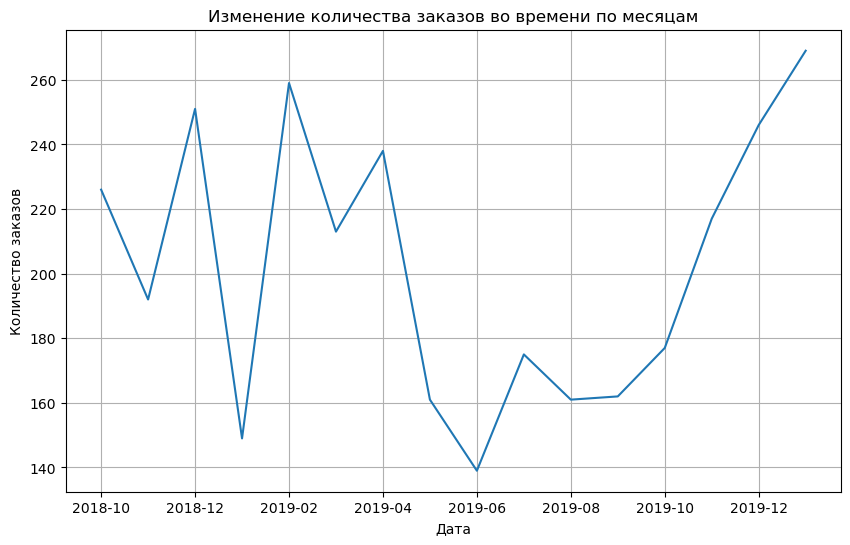

In [66]:
plt.figure(figsize=(10, 6))
orders_by_date.plot(kind='line')
plt.title('Изменение количества заказов во времени по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

График изменения количества заказов по месяцам выглядит волатильно. Сильное снижение заказов в январе 2019 года понятно(150) и может объясняться сезонностью, но сильное снижение количесвта уникальных заказов с апреля 2019 года непонятно. Далее количество уникальных заказов начинает расти с июня 2019 года,  продолжает увеличиваться и становится выше, чем было ранее(270). 

При этом рост кол-ва заказов с июня 2019 года не приводит росту выручки.

**Посчитаем среднее количество заказов на клиента**

In [67]:
#Рассчитаем среднее количество заказов на клиента
average_orders_per_customer = data.groupby('customer_id')['order_id'].nunique()
average_orders_per_customer.mean()

1.4812271062271063

In [68]:
average_orders_per_customer.median()

1.0

Среднее количество заказов на клиента равно 1

**Количество уникальных покупателей**

In [69]:
#посчитаем количество уникальных покупателей для каждой даты
customer_by_date = data.groupby('year_month')['customer_id'].nunique()
customer_by_date.mean()

183.6875

Срднее количество уникальных покупателей в месяц равно 183

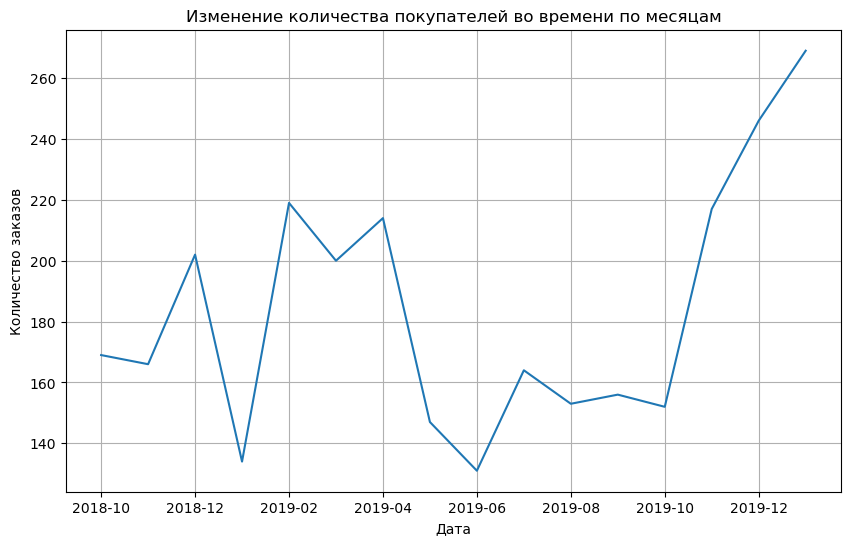

In [70]:
plt.figure(figsize=(10, 6))
customer_by_date.plot(kind='line')
plt.title('Изменение количества покупателей во времени по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Количество уникальных покупателей не выглядит постоянным с сильной просадкой в январе 2019 и снижении с апреля по июнь 2019 года. Количесвто уникальных покупателей с октября 2019 резко растет.

**Определим среднее количество покупок на клиента**

In [71]:
#посчитаем общее количество заказов для каждого клиента
purchase_count_per_customer = data.groupby('customer_id')['order_id'].nunique()
#среднее количество заказов на клиента
average_purchase_count_per_customer = purchase_count_per_customer.mean()
average_purchase_count_per_customer

1.4812271062271063

In [72]:
purchase_count_per_customer.median()

1.0

Среднее количество покупок на клиента равно около 1,5

**Определим среднее количество товаров в заказе**



In [73]:
#среднее количество товаров в заказе
quantity_per_order = data.groupby(['order_id', 'year_month'])['quantity'].sum()
quantity_per_order.mean()

3.646367851622875

In [74]:
quantity_per_order.median()

1.0

Среднее количество товаров в заказе равно 3.6, а медиана равна 1

In [75]:
#среднее количество товаров в заказе по месяцам
quantity_mean = data.groupby('year_month')['quantity'].mean()

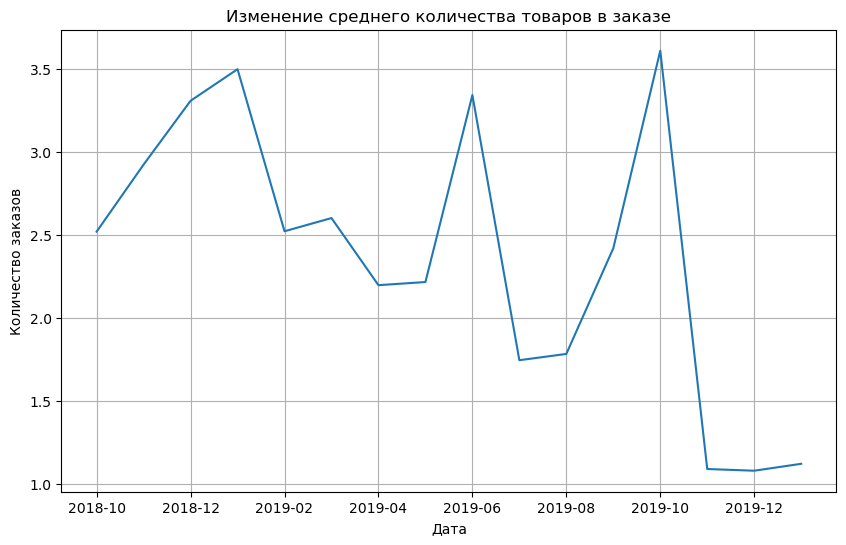

In [76]:
plt.figure(figsize=(10, 6))
quantity_mean.plot(kind='line')
plt.title('Изменение среднего количества товаров в заказе')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

Динамика изменений среднего количества товаров в заказе показывает, что среднее иемеет нисходящий тренд. При этом отдельные пики с максимальными значениями были в декабре(3,5) 2018 года, июне(3,4) и октябре(3,6) 2019 года. Также необходимо отметить резкое снижение в декабре(1) 2019.

In [77]:
#общее количество товаров в заказе
quantity = data.groupby('year_month')['quantity'].sum()

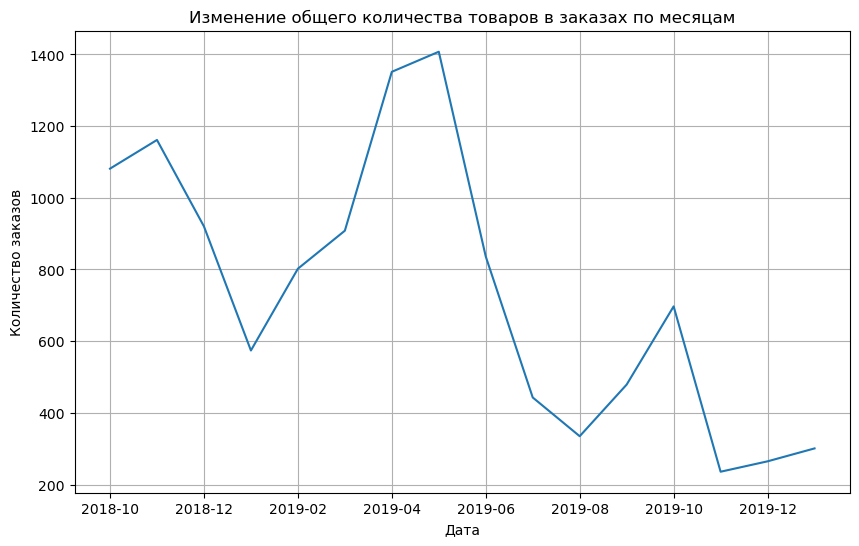

In [78]:
plt.figure(figsize=(10, 6))
quantity.plot(kind='line')
plt.title('Изменение общего количества товаров в заказах по месяцам')
plt.xlabel('Дата')
plt.ylabel('Количество заказов')
plt.grid(True)
plt.show()

На графике видно, что есть значительный пик вокруг июня(1400) 2019 года, когда количество заказанных товаров резко возросло, а затем резко упало к концу лета (400). Также просадка есть и в январе(600) 2018 года. Колебания графика могут свидетельствовать о сезонности или специфических событиях, влияющих на объем заказов. 

Возможные причины такого связаны с тем, что в нашем хозяйственном магазине много сезонных товаров, которые наиболее  востребованы в летний сезон. Но в целом, стоить отметить негативный тренд со снижение количества товаров, особенно после октября(250) 2019.  

**Процент клиентов, совершивших повторную покупку**

In [79]:
# Определение уникальных заказов для каждого клиента
unique_orders = data.groupby('customer_id')['order_id'].nunique()

# Определение клиентов с повторными покупками (более одного уникального заказа)
repeat_customers = unique_orders[unique_orders > 1]

# Подсчет процента клиентов с повторными покупками
percentage_repeat_customers = (len(repeat_customers) / len(unique_orders)) * 100

print(f"Процент клиентов с повторными покупками: {percentage_repeat_customers:.2f}%")

Процент клиентов с повторными покупками: 39.01%


**Определим cредний интервал времени между заказами**

In [80]:
#создадим time_diff, для разницы в днях между датами заказов для каждого клиента
data['time_diff'] = data.groupby('customer_id')['date'].diff()
#Заполним значения нулевым интервалом времени для первого заказа 
data['time_diff'] = data['time_diff'].fillna(pd.Timedelta(0))
data['time_diff'] = data['time_diff'].dt.days  #преобразуем в дни
data['time_diff'].mean()

38.1684

В среднем клиенты совершают следующий заказ через почти 38 дней

**Посчитаем lifetime**

In [81]:
data['lifetime'] = data.groupby('customer_id')['date'].transform(lambda x: (x.max() - x.min()).days)

In [82]:
data.groupby('customer_id')['lifetime'].min().describe()

count    2184.000000
mean       87.410714
std       130.781394
min         0.000000
25%         0.000000
50%         0.000000
75%       187.000000
max       395.000000
Name: lifetime, dtype: float64

Получается, что в среднем lifetime покупателя равен 87 дней

In [83]:
#check  time_diff и lifetime
data.loc[data['customer_id'] == '4d93d3f6-8b24-403b-a74b-f5173e40d7db']

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month,category,category_2,category_3,time_diff,lifetime
12,2018-10-01 13:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68485,Чехол Eurogold Clean Basic хлопок для досок 120х38-120х42 см C42,1,187.0,187.0,10,2018,2018-10-01,2018-10,чехол,чехол,нет категории,0,23
21,2018-10-02 10:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68491,Сумка-тележка 2-х колесная Gimi Argo синяя,1,1049.0,1049.0,10,2018,2018-10-02,2018-10,сумка и тележка,сумка и тележка,сумка и тележка,0,23
42,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,"Щетка-сметка 3-х рядная деревянная 450 мм (плоская ручка), Поиск Риф 1801095",15,49.0,735.0,10,2018,2018-10-02,2018-10,щетка-сметка 3-х рядная,ванная комната,ванная комната,0,23
43,2018-10-02 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68493,"Щетка-сметка 4-х рядная деревянная 300 мм (фигурная ручка) ворс 5,5 см 1801096",15,70.0,1050.0,10,2018,2018-10-02,2018-10,щетка-сметка 4-х рядная,ванная комната,ванная комната,0,23
46,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Вилка столовая RIPPLE сталь 3 мм, 3 шт, Attribute, ACR013",1,187.0,187.0,10,2018,2018-10-02,2018-10,посуда,кухня и посуда,кухня и посуда,0,23
47,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка столовая RIPPLE сталь 3 мм, 3 шт, Attribute, ACR023",1,202.0,202.0,10,2018,2018-10-02,2018-10,посуда,кухня и посуда,кухня и посуда,0,23
48,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Ложка чайная RIPPLE сталь 2,5 мм, 3 шт, Attribute, ACR033",1,142.0,142.0,10,2018,2018-10-02,2018-10,посуда,кухня и посуда,кухня и посуда,0,23
49,2018-10-02 14:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68503,"Нож столовый RIPPLE 80 г 2 шт, Attribute, ACR042",1,172.0,172.0,10,2018,2018-10-02,2018-10,посуда,кухня и посуда,кухня и посуда,0,23
50,2018-10-02 15:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68506,"Герань домашняя (пеларгония зональная) цветущая D12, H25-30, коралловая, полумахровая",11,142.0,1562.0,10,2018,2018-10-02,2018-10,сад и огород,сад и огород,сад и огород,0,23
70,2018-10-03 11:00:00,4d93d3f6-8b24-403b-a74b-f5173e40d7db,68516,Сушилка для белья потолочно-настенная Gimi Lift 200,1,1649.0,1649.0,10,2018,2018-10-03,2018-10,сушилка,сушилка,сушилка,0,23


In [84]:
#check для 0 time_diff и 0 lifetime
data.loc[data['customer_id'] == 'ffe82299-3f5b-4214-87fe-3d36ecccfac3']

,date,customer_id,order_id,product,quantity,price,revenue,month,year,year_month_day,year_month,category,category_2,category_3,time_diff,lifetime
6677,2019-10-22 13:00:00,ffe82299-3f5b-4214-87fe-3d36ecccfac3,73060,"Сушилка для белья потолочная Лиана 1,8 м 1703007",1,577.0,577.0,10,2019,2019-10-22,2019-10,сушилка,сушилка,сушилка,0,0


Все верно для двух customer_id

**Вывод:**

- При анализе выручки по дням выявлены выбросы (выбросы от 30 до 70 тыс.) в некоторые дни. Выручка имеет отрицательный тренд на снижение, с пиком в ноябре 2018 года и постоянным уменьшением до октября 2019 года. Анализ скользящего среднего выручки также показывает отрицательный тренд и снижение выручки. Это может быть связано с уменьшением цен, снижением качества товаров или услуг, увеличением конкуренции или изменением потребительского спроса. Средний чек равен 1647, а медианное значение 843. Сильное отличие средней выручки от медианной также по причине наличия выбросов.

- Количество заказов волатильно, с сильными колебаниями по месяцам, что может быть связано с сезонностью. Самый высокий пик заказов был в июне 2019 года, когда количество заказанных товаров также достигло максимума. Однако, рост количества заказов с июня 2019 года не приводит к росту выручки, что может быть связано с маржинальностью или средним чеком ?

- Среднее количество товаров в заказе равно 3.6, а медиана равна 1, что говорит о том, что есть большой разброс в количестве товаров в заказе. Динамика изменений среднего количества товаров в заказе показывает, что среднее имеет нисходящий тренд, с резким снижением в декабре 2019 года. Также некоторые пики в количестве товаров заказа могут быть связаны с сезонностью.


- Количество покупателей также имеет волатильное поведение, с сильным снижением в январе и апреле-июне 2019 года и резким ростом в октябре 2019 года. Среднее количество покупок на клиента равно около 1,5, а медиана равна 1, что также свидетельствует о низкой частоте покупок и о низкой лояльности клиентов. Также это подтверждает низкий процент клиентов с повторными покупками в 39.01%.

Анализ lifetime и периода между заказами позволяет сделать вывод, что клиенты в среднем делают следующий заказ через почти 38 дней. Однако среднее количество уникальных покупателей в месяц вырастает с октября 2019 года, что может говорить о повышении привлекательности магазина.

**Посмотрим как выглядит наш средний клиент**

In [85]:
#cгруппируем данные по уникальным customer_id
mean_customer = data.groupby('customer_id').agg({
    'revenue': 'sum',
    'quantity': 'sum',
    'price': ['mean', 'sum'],
    'month': 'nunique',
    'order_id': 'nunique',
    'lifetime': 'min'
}).reset_index()

In [86]:
mean_customer.columns = ['customer_id', 'revenue', 'quantity', 'price_mean', 'price_sum', 'month_count', 'order_count', 'lifetime']

In [87]:
#check
mean_customer.head()

,customer_id,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,4,138.75,555.0,1,1,0
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1,442.00,442.0,1,1,0
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,2,457.00,457.0,1,1,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1,1649.00,1649.0,1,1,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,2,1162.00,1162.0,1,1,0


In [88]:
#check
mean_customer.tail()

,customer_id,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime
2179,ff0c73c3-6b62-4e67-8e12-bb83ed1851d5,899.0,1,899.000000,899.0,1,1,0
2180,ff422162-fc4a-4b65-a0e2-17f5095ea2c6,1610.0,3,536.666667,1610.0,1,3,0
2181,ff601403-b094-4b86-9ac6-264d725b9277,1739.0,2,869.500000,1739.0,2,2,155
2182,ffb80538-3fda-4351-8ea9-9d2bec58bb07,974.0,1,974.000000,974.0,1,1,0
2183,ffe82299-3f5b-4214-87fe-3d36ecccfac3,577.0,1,577.000000,577.0,1,1,0


In [89]:
#изучим средние значения и стандартные отклонения
mean_customer.describe()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime
count,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000,2184.000000
mean,1647.907700,5.401099,714.547882,1238.005533,1.322344,1.481227,87.410714
std,4377.883442,16.994362,1036.619583,3285.158039,0.479096,2.802822,130.781394
min,15.000000,1.000000,14.000000,14.000000,1.000000,1.000000,0.000000
25%,400.500000,1.000000,134.458333,224.000000,1.000000,1.000000,0.000000
50%,843.750000,2.000000,342.500000,658.500000,1.000000,1.000000,0.000000
75%,1799.000000,3.000000,899.000000,1499.000000,2.000000,2.000000,187.000000
max,152028.000000,334.000000,14917.000000,132649.000000,6.000000,125.000000,395.000000



- средний клиент тратит **1647.91** на каждый заказ, покупая в среднем **5.4** товара со средней ценой **714.55**.
- средний клиент совершает покупки в течение **1.3** месяца между заказам, делая в среднем **1.5** заказа за все время.
- Lifetime среднего клиента равен **87.4** дней с момента первой покупки до последней.

Средний клиент готов потратить на товар достаточно значительную сумму денег и покупает достаточно много товаров за один заказ, но не очень часто и редко к нам возвращается. Возможно главные проблемы: низкая лояльность клиентов из-за высокой конкуренции на рынке, а также специфики магазина и его специализации(ассортимента товаров). 

Высокий разброс в выручке, количестве товаров и сумме цен за заказ может указывать на наличие сегмента клиентов с различными предпочтениями и поведением. Поэтому сделаем кластеризацию наших клиентов.

<a id="4"></a>
# 4. Сделаем кластеризацию клиентов

# 1 Вариант кластеризации

В 1 варианте кластеризации проведем группировку по клиентам и рассмотрим 6 признаков

In [90]:
mean_customer.columns = ['customer_id', 'revenue', 'quantity', 'price_mean', 'price_sum', 'month_count', 'order_count', 'lifetime']
a = mean_customer[['revenue', 'quantity', 'price_mean', 'month_count', 'order_count', 'lifetime']]

In [91]:
#check
a.head()

,revenue,quantity,price_mean,month_count,order_count,lifetime
0,555.0,4,138.75,1,1,0
1,442.0,1,442.00,1,1,0
2,914.0,2,457.00,1,1,0
3,1649.0,1,1649.00,1,1,0
4,2324.0,2,1162.00,1,1,0


In [92]:
#check
a.tail()

,revenue,quantity,price_mean,month_count,order_count,lifetime
2179,899.0,1,899.000000,1,1,0
2180,1610.0,3,536.666667,1,3,0
2181,1739.0,2,869.500000,2,2,155
2182,974.0,1,974.000000,1,1,0
2183,577.0,1,577.000000,1,1,0


In [93]:
#создадим объект класса StandardScaler и применим его 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_sc = scaler.fit_transform(a) #обучаем scaler 
x_sc[:5]

array([[-2.49700114e-01, -8.24638042e-02, -5.55584477e-01,
        -6.72972497e-01, -1.71733129e-01, -6.68525774e-01],
       [-2.75517585e-01, -2.59033361e-01, -2.62980079e-01,
        -6.72972497e-01, -1.71733129e-01, -6.68525774e-01],
       [-1.67678237e-01, -2.00176842e-01, -2.48506655e-01,
        -6.72972497e-01, -1.71733129e-01, -6.68525774e-01],
       [ 2.49561285e-04, -2.59033361e-01,  9.01648143e-01,
        -6.72972497e-01, -1.71733129e-01, -6.68525774e-01],
       [ 1.54468968e-01, -2.00176842e-01,  4.31744296e-01,
        -6.72972497e-01, -1.71733129e-01, -6.68525774e-01]])

**Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков**

In [94]:
from scipy.cluster.hierarchy import dendrogram, linkage

In [95]:
linked = linkage(x_sc, method = 'ward')
linked

array([[0.00000000e+00, 1.95900000e+03, 0.00000000e+00, 2.00000000e+00],
       [1.00000000e+00, 1.58300000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.19900000e+03, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.36000000e+03, 4.36300000e+03, 5.09403888e+01, 1.44400000e+03],
       [1.70600000e+03, 4.36100000e+03, 8.40462793e+01, 7.40000000e+02],
       [4.36400000e+03, 4.36500000e+03, 8.78572202e+01, 2.18400000e+03]])

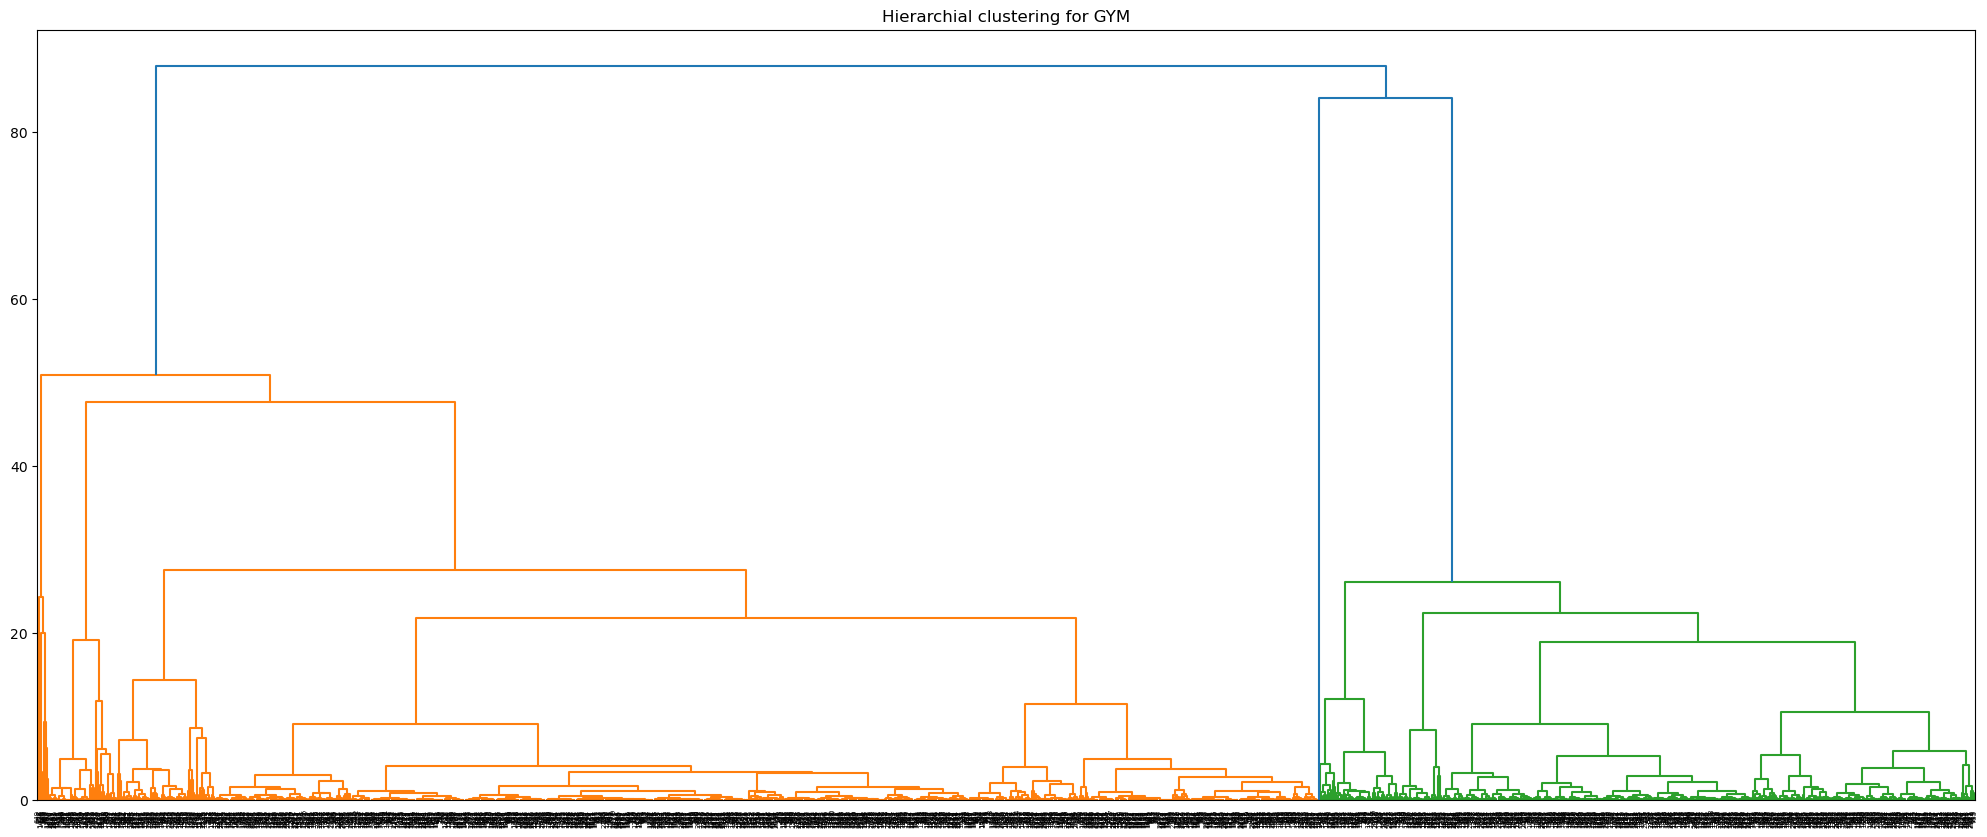

In [96]:
#нарисуем дендрограмму
plt.figure(figsize=(25, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

Получается 2 кластера 

# Рассмотрим второй вариант кластеризации используя категории товаров

Во 2 варианте кластеризации мы добавим столбец с категориями товаров из category_3 и преобразуем категории в отдельные столбцы с помощью One-Hot Encoding. 

In [97]:
#Преобразуем категории в отдельные столбцы с помощью One-Hot Encoding
category_columns = pd.get_dummies(data['category_3'])
#присоеденим 
data_with_categories = pd.concat([data['customer_id'], category_columns], axis=1)

#сгруппируем данные по клиентам и суммируем покупки в каждой категории
grouped_data = data_with_categories.groupby('customer_id').sum().reset_index()
grouped_data.head()

,customer_id,ванная комната,гладильные доски,ковры,кухня и посуда,муляж,нет категории,рассада,растения и цветы,сад и огород,сумка и тележка,сушилка
0,000d6849-084e-4d9f-ac03-37174eaf60c4,0,0,0,0,0,0,0,0,4,0,0
1,001cee7f-0b29-4716-b202-0042213ab038,0,0,0,0,0,0,0,0,0,0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,0,0,0,0,0,1,0,0,0,0,0
3,002d4d3a-4a59-406b-86ec-c3314357e498,0,0,0,0,0,0,0,0,0,1,0
4,003bbd39-0000-41ff-b7f9-2ddaec152037,0,0,0,0,0,1,0,0,0,0,0


In [98]:
b = pd.concat([mean_customer, grouped_data], axis=1)
b = b.drop(columns=['customer_id'])
b.head()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,ванная комната,гладильные доски,ковры,кухня и посуда,муляж,нет категории,рассада,растения и цветы,сад и огород,сумка и тележка,сушилка
0,555.0,4,138.75,555.0,1,1,0,0,0,0,0,0,0,0,0,4,0,0
1,442.0,1,442.00,442.0,1,1,0,0,0,0,0,0,0,0,0,0,0,1
2,914.0,2,457.00,457.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0
3,1649.0,1,1649.00,1649.0,1,1,0,0,0,0,0,0,0,0,0,0,1,0
4,2324.0,2,1162.00,1162.0,1,1,0,0,0,0,0,0,1,0,0,0,0,0


In [99]:
#создадим объект класса StandardScaler и применим его 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
x_sc_1 = scaler.fit_transform(b) #обучаем scaler 
x_sc_1[:5]

array([[-2.49700114e-01, -8.24638042e-02, -5.55584477e-01,
        -2.07954060e-01, -6.72972497e-01, -1.71733129e-01,
        -6.68525774e-01, -2.91099978e-01, -1.87338013e-01,
        -2.01437467e-01, -2.67965445e-01, -1.13572153e-01,
        -3.68594495e-01, -1.84687989e-01, -2.20085751e-01,
         1.44338154e+00, -2.71743650e-01, -2.23538893e-01],
       [-2.75517585e-01, -2.59033361e-01, -2.62980079e-01,
        -2.42359065e-01, -6.72972497e-01, -1.71733129e-01,
        -6.68525774e-01, -2.91099978e-01, -1.87338013e-01,
        -2.01437467e-01, -2.67965445e-01, -1.13572153e-01,
        -3.68594495e-01, -1.84687989e-01, -2.20085751e-01,
        -3.05249876e-01, -2.71743650e-01,  1.47163104e+00],
       [-1.67678237e-01, -2.00176842e-01, -2.48506655e-01,
        -2.37792029e-01, -6.72972497e-01, -1.71733129e-01,
        -6.68525774e-01, -2.91099978e-01, -1.87338013e-01,
        -2.01437467e-01, -2.67965445e-01, -1.13572153e-01,
         6.28940050e-01, -1.84687989e-01, -2.20085751e

**Построим матрицу расстояний функцией linkage() на стандартизованной матрице признаков**

In [100]:
linked_b = linkage(x_sc_1, method = 'ward')
linked_b

array([[1.12600000e+03, 1.21200000e+03, 0.00000000e+00, 2.00000000e+00],
       [2.00000000e+00, 1.19900000e+03, 0.00000000e+00, 2.00000000e+00],
       [3.00000000e+00, 1.46000000e+02, 0.00000000e+00, 2.00000000e+00],
       ...,
       [4.32600000e+03, 4.36200000e+03, 5.99221882e+01, 1.40200000e+03],
       [4.36300000e+03, 4.36400000e+03, 8.52352664e+01, 2.18300000e+03],
       [1.70600000e+03, 4.36500000e+03, 1.47207790e+02, 2.18400000e+03]])

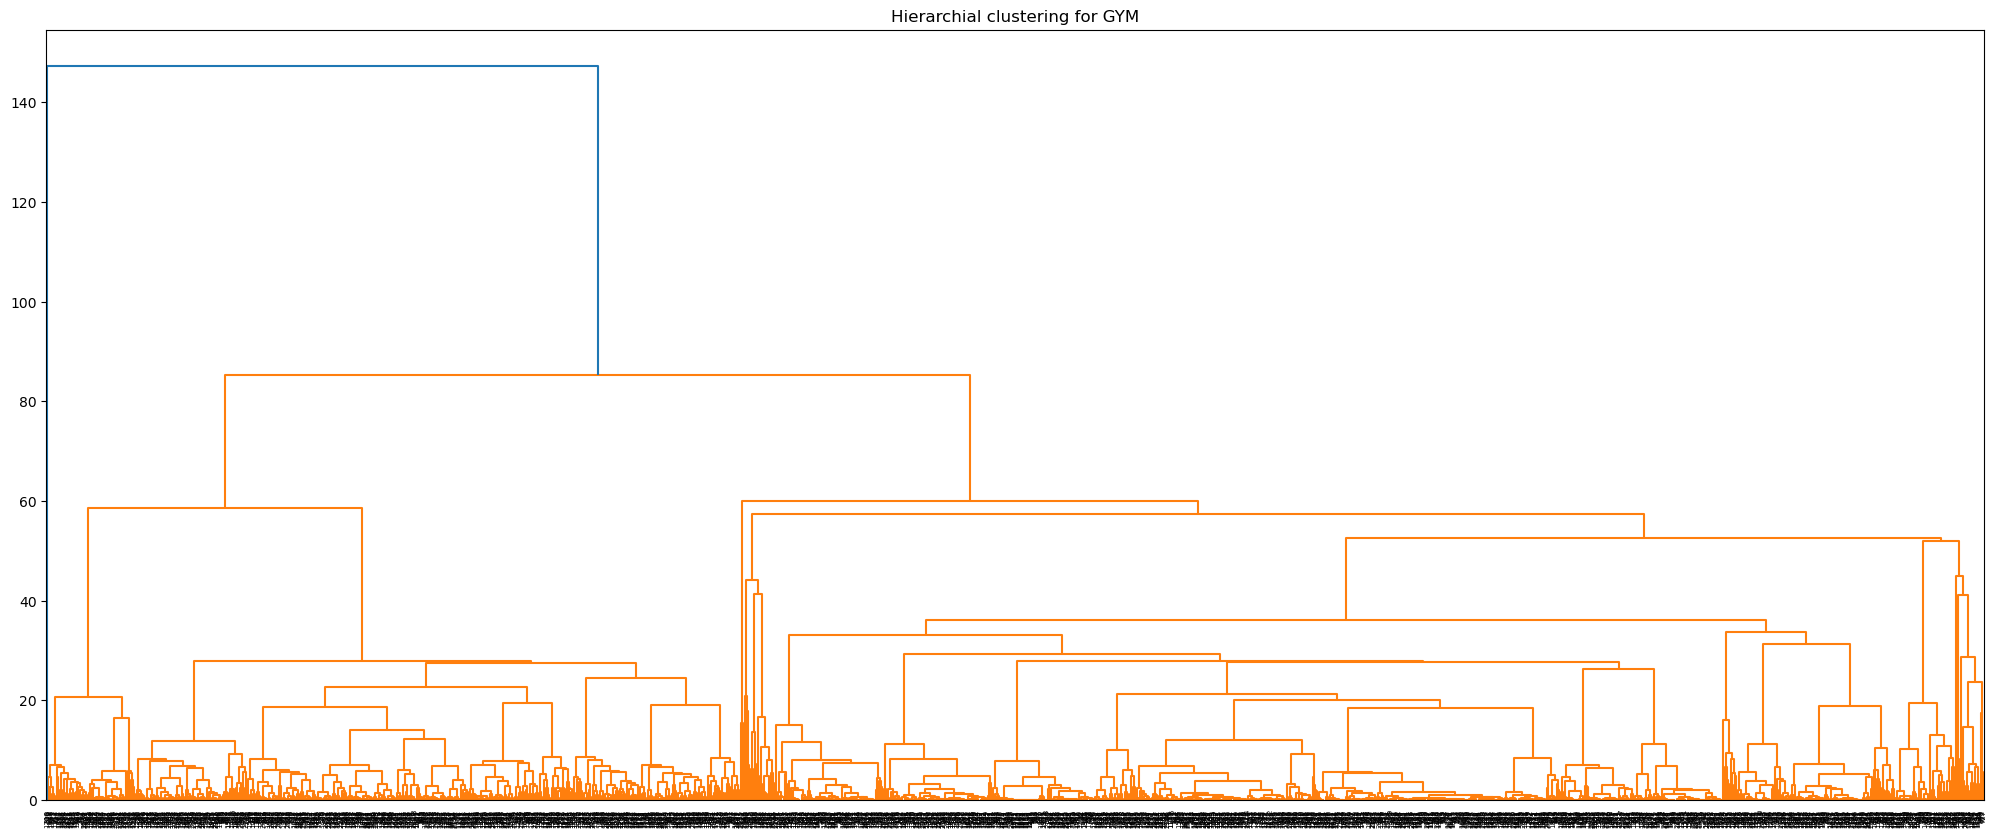

In [101]:
#нарисуем дендрограмму
plt.figure(figsize=(25, 10))  
dendrogram(linked_b, orientation='top')
plt.title('Hierarchial clustering for GYM')
plt.show() 

In [102]:
km = KMeans(n_clusters=2, random_state=0) #задаём число кластеров равное 2, и фиксируем значение random_state для воспроизводимости результата
labels_1 = km.fit_predict(x_sc_1) #применяем алгоритм к данным и формируем вектор кластеров 

In [103]:
#посчитаем метрику силуэта для нашей кластеризации
from sklearn.metrics import silhouette_score

'Silhouette_score: {:.2f}'.format(silhouette_score(x_sc_1, labels_1)) 

'Silhouette_score: 0.96'

**Обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов**

In [104]:
from sklearn.cluster import KMeans
km = KMeans(n_clusters=2, random_state=0) #задаём число кластеров равное 2, и фиксируем значение random_state для воспроизводимости результата
labels = km.fit_predict(x_sc) #применяем алгоритм к данным и формируем вектор кластеров 

In [105]:
labels #check

array([1, 1, 1, ..., 0, 1, 1], dtype=int32)

In [106]:
#сохраним метки кластера в поле нашего датасета
mean_customer['cluster_km'] = labels

In [107]:
mean_customer['cluster_km'].unique()

array([1, 0], dtype=int32)

In [108]:
mean_customer['cluster_km'].value_counts()

1    1439
0     745
Name: cluster_km, dtype: int64

**Метрика силуэта для кластеризации**

In [109]:
#посчитаем метрику силуэта для нашей кластеризации
from sklearn.metrics import silhouette_score

'Silhouette_score: {:.2f}'.format(silhouette_score(x_sc, labels)) 

'Silhouette_score: 0.59'

Значение метрики силуэта принимает значения от -1 до 1. Чем ближе к 1, тем качественнее кластеризация. Значение силуэта равно 0.59, что говорит о хорошей степени кластеризации. Значение 0.59 обычно считается довольно хорошим и указывает на четкое разделение кластеров.

**Составим портрет покупателя для каждого кластера. Сравненить сегменты по ключевым метрикам. .**

In [110]:
cluster_1 = mean_customer[mean_customer['cluster_km'] == 1]
cluster_1.head()

,customer_id,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km
0,000d6849-084e-4d9f-ac03-37174eaf60c4,555.0,4,138.75,555.0,1,1,0,1
1,001cee7f-0b29-4716-b202-0042213ab038,442.0,1,442.00,442.0,1,1,0,1
2,00299f34-5385-4d13-9aea-c80b81658e1b,914.0,2,457.00,457.0,1,1,0,1
3,002d4d3a-4a59-406b-86ec-c3314357e498,1649.0,1,1649.00,1649.0,1,1,0,1
4,003bbd39-0000-41ff-b7f9-2ddaec152037,2324.0,2,1162.00,1162.0,1,1,0,1


In [111]:
cluster_1.describe()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.0
mean,1484.465254,6.694232,655.954302,916.446491,1.002780,1.116053,0.248089,1.0
std,3402.288933,18.853388,1114.183080,1618.874375,0.052668,1.002646,2.029756,0.0
min,15.000000,1.000000,14.000000,14.000000,1.000000,1.000000,0.000000,1.0
25%,314.500000,1.000000,112.600000,149.000000,1.000000,1.000000,0.000000,1.0
50%,734.000000,2.000000,217.000000,449.000000,1.000000,1.000000,0.000000,1.0
75%,1574.000000,5.000000,749.000000,1087.000000,1.000000,1.000000,0.000000,1.0
max,53728.000000,334.000000,14917.000000,30397.000000,2.000000,34.000000,28.000000,1.0


**Вывод:**
кластер характеризуется более низким средним чеком и большим количеством товаров в заказе по сравнению с другим кластером, а такеже более низким lifetime. Клиенты этого кластера склонны к редким, но более объемным покупкам. 

Средний клиент из данного кластера:
- Количество: 1439 клиентов
- Средний чек: 1484.5 
- Средний цена за товар: 655.95
- Количество товаров в заказе: в среднем 6.69, но медиана равна 2.
- Лояльность: очень низкая, как правило соврешают только один заказ. lifetime близок к нулю, потому что клиенты не возвращаются. Практически все клиенты из этого кластера совершают всего один заказ, что отражено в значениях 25%, 50%, и 75% квартилей.


Для кластера можно провести мероприятия по повышению лояльности и стимулированию повторных покупок.
Бизнес может обратить внимание на стратегии для удержания клиентов в данном кластере, так как продолжительность отношений относительно низкая.
Персонализированные предложения и скидки для стимулирования повторных покупок могут быть эффективными инструментами для привлечения клиентов кластера. 

In [112]:
cluster_0 = mean_customer[mean_customer['cluster_km'] == 0]
cluster_0.head()

,customer_id,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km
6,005ba170-45e8-42de-93f7-192481ae2659,7857.0,3,2264.000000,4528.0,2,2,371,0
8,00c0f92a-121a-4883-a78d-2c7b5fe187de,321.0,2,160.500000,321.0,2,2,291,0
10,00cd704a-a65c-4865-b39a-779f1b4f1d1a,213.0,2,106.500000,213.0,2,2,293,0
12,00ff5327-0fba-481c-8a07-47a95093a213,1146.5,2,573.250000,1146.5,2,2,286,0
17,0184f535-b60a-4914-a982-231e3f615206,3655.0,39,97.636364,1074.0,2,3,45,0


In [113]:
cluster_0.describe()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0
mean,1963.603915,2.903356,827.723938,1859.110850,1.939597,2.186577,255.769128,0.0
std,5806.086888,12.284543,856.809123,5100.426052,0.298477,4.511197,84.261261,0.0
min,84.000000,2.000000,42.000000,84.000000,1.000000,2.000000,7.000000,0.0
25%,606.000000,2.000000,275.500000,598.000000,2.000000,2.000000,184.000000,0.0
50%,1108.000000,2.000000,532.000000,1086.000000,2.000000,2.000000,277.000000,0.0
75%,2292.000000,2.000000,1049.500000,2143.000000,2.000000,2.000000,314.000000,0.0
max,152028.000000,324.000000,6865.500000,132649.000000,6.000000,125.000000,395.000000,0.0


**Вывод:** Эти клиенты совершают крупные покупки, но очень редко. Средний клиент из данного кластера показывает более высокий средний чек и более высокую лояльность.
Важно отметить, что количество заказов примерно одинаково в обоих кластерах, но структура этих заказов (средний чек и количество товаров) различается.

Средний клиент из данного кластера:
- Количество: 745 клиентов
- Средний чек: 7857.0. (высокий)
- Количество заказов: в среднем 3. Медиана 2. 
- Средний цена за товар: 2264.0
- Количество товаров в заказе: в среднем 3.
- Лояльность:выше, чем в другом кластере. lifetime в среднем равен 255 дней, что очень много. Средний интервал между заказами: 2 месяца. Большинство клиентов из данного кластера совершают 2 заказа, что отражено в значениях 25%, 50%, и 75% квартилей.

Работа с программами лояльности, бонусов и персонализированными предложениями может быть эффективной стратегией, потому что главной целью может быть удержание клиентов этого кластера и стимулирование покупать чаще. Для стимулирования повторных покупок можно предложить специальные акции, программы лояльности или рекомендации товаров.

**Добавим категории товаров**

Рассмотрим распределения для категории товаров в каждом кластере и сравним их 

In [114]:
cluster_group = pd.concat([mean_customer, grouped_data], axis=1)
cluster_group = cluster_group.drop(columns=['customer_id'])
cluster_group.head()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km,ванная комната,гладильные доски,ковры,кухня и посуда,муляж,нет категории,рассада,растения и цветы,сад и огород,сумка и тележка,сушилка
0,555.0,4,138.75,555.0,1,1,0,1,0,0,0,0,0,0,0,0,4,0,0
1,442.0,1,442.00,442.0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1
2,914.0,2,457.00,457.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0
3,1649.0,1,1649.00,1649.0,1,1,0,1,0,0,0,0,0,0,0,0,0,1,0
4,2324.0,2,1162.00,1162.0,1,1,0,1,0,0,0,0,0,1,0,0,0,0,0


In [115]:
#рассмотрим распределения для категории товаров из первого кластера
cluster_group_1 = cluster_group[cluster_group['cluster_km'] == 1]
cluster_group_1.describe()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km,ванная комната,гладильные доски,ковры,кухня и посуда,муляж,нет категории,рассада,растения и цветы,сад и огород,сумка и тележка,сушилка
count,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.0,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000,1439.000000
mean,1484.465254,6.694232,655.954302,916.446491,1.002780,1.116053,0.248089,1.0,0.126477,0.066713,0.041696,0.130646,0.095205,0.325226,0.340514,0.149409,0.758860,0.121612,0.090341
std,3402.288933,18.853388,1114.183080,1618.874375,0.052668,1.002646,2.029756,0.0,0.499639,0.263173,0.229134,0.575000,0.779589,0.944125,1.721812,0.679972,2.487147,0.387314,0.371307
min,15.000000,1.000000,14.000000,14.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,314.500000,1.000000,112.600000,149.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,734.000000,2.000000,217.000000,449.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1574.000000,5.000000,749.000000,1087.000000,1.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,53728.000000,334.000000,14917.000000,30397.000000,2.000000,34.000000,28.000000,1.0,10.000000,2.000000,3.000000,12.000000,17.000000,17.000000,23.000000,13.000000,43.000000,5.000000,8.000000


In [116]:
#рассмотрим распределения для категории товаров из второго кластера
cluster_group_0 = cluster_group[cluster_group['cluster_km'] == 0] 
cluster_group_0.describe()

,revenue,quantity,price_mean,price_sum,month_count,order_count,lifetime,cluster_km,ванная комната,гладильные доски,ковры,кухня и посуда,муляж,нет категории,рассада,растения и цветы,сад и огород,сумка и тележка,сушилка
count,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.0,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000,745.000000
mean,1963.603915,2.903356,827.723938,1859.110850,1.939597,2.186577,255.769128,0.0,0.225503,0.144966,0.075168,0.197315,0.029530,0.455034,0.123490,0.093960,0.581208,0.233557,0.212081
std,5806.086888,12.284543,856.809123,5100.426052,0.298477,4.511197,84.261261,0.0,0.633003,0.769324,0.319169,0.565584,0.169401,1.102748,0.591879,0.369217,1.839434,0.846690,0.863298
min,84.000000,2.000000,42.000000,84.000000,1.000000,2.000000,7.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,606.000000,2.000000,275.500000,598.000000,2.000000,2.000000,184.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1108.000000,2.000000,532.000000,1086.000000,2.000000,2.000000,277.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,2292.000000,2.000000,1049.500000,2143.000000,2.000000,2.000000,314.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,152028.000000,324.000000,6865.500000,132649.000000,6.000000,125.000000,395.000000,0.0,13.000000,19.000000,5.000000,9.000000,1.000000,26.000000,11.000000,4.000000,27.000000,20.000000,21.000000


Рассмотрев распределения для всех категорий товаров из обоих кластеров можно сказать, что средние значения в одинаковых категориях не отличаются для разных кластеров

**Вывод:**

Кластер 1: кластер характеризуется более низким средним чеком и большим количеством товаров в заказе по сравнению с другим кластером, а такеже более низким lifetime. Клиенты этого кластера склонны к редким, но более объемным покупкам.

Кластер 0: эти клиенты совершают крупные покупки, но очень редко. Средний клиент из данного кластера показывает более высокий средний чек и более высокую лояльность. Важно отметить, что количество заказов примерно одинаково в обоих кластерах, но структура этих заказов (средний чек и количество товаров) различается.

Рассмотрев распределения для всех категорий товаров из обоих кластеров можно сказать, что средние значения в одинаковых категориях не отличаются для разных кластеров.

<a id="5"></a>
# 5. Проверка гипотез

**Одинаковый средний чек у клиентов из кластера 1 и кластера 2**

Для проведения A/B теста среднего чека между клиентами из кластера 1 и кластера 2, мы можем использовать t-тест для независимых выборок. 

**Нулевая гипотеза (H0):** средний чек клиентов из кластера 1 равен среднему чеку клиентов из кластера 2.

**Альтернативная гипотеза (H1):** средний чек клиентов из кластера 1 отличается от среднего чека клиентов из кластера 2.

In [117]:
#Извлечение необходимых данных
revenue_cluster0 = cluster_0.groupby('customer_id')['revenue'].mean()
revenue_cluster1 = cluster_1.groupby('customer_id')['revenue'].mean()

Применим статистический тест для определения различий между выборками

In [118]:
#Проведем t-тест для независимых выборок
alpha = 0.05  # Уровень значимости
result = stats.ttest_ind(revenue_cluster1, revenue_cluster0, equal_var=False)

print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Существуют статистически значимые различия в среднем чеке между кластерами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых различий в среднем чеке между кластерами.")

0.038190639766231695
Отвергаем нулевую гипотезу. Существуют статистически значимые различия в среднем чеке между кластерами.


Значение p-value равно 0.038, что меньше обычно используемого уровня значимости 0.05. Это говорит о том, что различия статистически значимы. Таким образом, на основе результатов A/B теста можно сделать вывод о том, что существуют статистически значимые различия в средних чеках между клиентами из кластера 1 и кластера 2. 

**Одинаковое количество товаров в заказе у клиентов из кластера 1 и кластера 2**

Для проведения A/B теста количества товаров в заказе между клиентами из кластера 1 и кластера 2, мы также можем использовать t-тест для независимых выборок. 

**Нулевая гипотеза (H0):** среднее количество товаров в заказе для клиентов из кластера 1 равно среднему количеству товаров в заказе для клиентов из кластера 2.

**Альтернативная гипотеза (H1):** среднее количество товаров в заказе для клиентов из кластера 1 отличается от среднего количества товаров в заказе для клиентов из кластера 2.

In [119]:
#Извлечение необходимых данных
# Данные для кластера 0
quantity_cluster0 = cluster_0.groupby('customer_id')['quantity'].mean()
# Данные для кластера 1
quantity_cluster1 = cluster_1.groupby('customer_id')['quantity'].mean()

Применим статистический тест для определения различий между выборками

In [120]:
#Проведем t-тест для независимых выборок
alpha = 0.05  # Уровень значимости
result = stats.ttest_ind(quantity_cluster1, quantity_cluster0, equal_var=False)

print(result.pvalue)
if result.pvalue < alpha:
    print("Отвергаем нулевую гипотезу. Существуют статистически значимые различия в количестве товаров в заказе между кластерами.")
else:
    print("Не отвергаем нулевую гипотезу. Нет статистически значимых различий в количестве товаров в заказе между кластерами.")

1.786911660419517e-08
Отвергаем нулевую гипотезу. Существуют статистически значимые различия в количестве товаров в заказе между кластерами.


Имея p-value меньше выбранного уровня значимости alpha и очень близкое к нулю, что говорит о том, что различия статистически значимы. Поэтому на основе результатов A/B теста по количеству товаров в заказе можно сделать вывод о том, что существуют статистически значимые различия между клиентами из кластера 1 и кластера 2. 

<a id="6"></a>
# 6. Общий вывод

**1. Изучили общую информацию.** 
Датасет содержит кол-во строк 7474 пропусков в данных нет. Во всех столбцах верный тип данных, кроме стобцов date и product и их нужно рассмотреть подробнее.

**2. Подготовили данные.**
В датасете представлены данные  с 1 октября 2018 по 31 января 2020.

Максимальное кол-во товара при покупке составило 1000 штук. Минимальное кол-во равно 1 шт (нет ошибок или возвратов). Максимальная цена товара составляет 14917. Медианная цена 1 товара составляет 150, а средняя цена 1 товара отличается сильно и составляет 530.

Всего в датасете представлено 2196 уникальных товаров и по товарному ассортименту это похоже на хозяйственный магазин. После проведения категоризации у нас получилось 11 категорий товаров. Наиболее популярные категории товаров: сад и огород 1699; Нет категории 929; рассада 674; ванная комната 389; сумка и тележка 382; кухня и посуда 363; сушилка 319.

Данные не содержали явные дубликаты. Провели отчистку данных по принципу "1 клиент = 1 заказ" и "1 заказ = 1 дата" и удалили строки с ошибками. После проверки и удаления осталась 5001 строка. Также обработали столбцы date и преобразовали в нужный тип данные.

**3. Исследовательский анализ данных (EDA).**
Выручка за все время составила 3 599 030. При анализе выручки по дням выявлены выбросы (выбросы от 30 до 70 тыс.) в некоторые дни. Выручка имеет отрицательный тренд на снижение, с пиком в ноябре 2018 года и постоянным уменьшением до октября 2019 года. Анализ скользящего среднего выручки также показывает отрицательный тренд и снижение выручки. Это может быть связано с уменьшением цен, снижением качества товаров или услуг, увеличением конкуренции или изменением потребительского спроса. Средний чек равен 1647, а медианное значение 843. Сильное отличие средней выручки от медианной также по причине наличия выбросов.

Количество заказов волатильно, с сильными колебаниями по месяцам, что может быть связано с сезонностью. Самый высокий пик заказов был в июне 2019 года, когда количество заказанных товаров также достигло максимума. Однако, рост количества заказов с июня 2019 года не приводит к росту выручки, что может быть связано с маржинальностью или средним чеком ?

Среднее количество товаров в заказе равно 3.6, а медиана равна 1, что говорит о том, что есть большой разброс в количестве товаров в заказе. Динамика изменений среднего количества товаров в заказе показывает, что среднее имеет нисходящий тренд, с резким снижением в декабре 2019 года. Также некоторые пики в количестве товаров заказа могут быть связаны с сезонностью.

Количество покупателей также имеет волатильное поведение, с сильным снижением в январе и апреле-июне 2019 года и резким ростом в октябре 2019 года. Среднее количество покупок на клиента равно около 1,5, а медиана равна 1, что также свидетельствует о низкой частоте покупок и о низкой лояльности клиентов. Также это подтверждает низкий процент клиентов с повторными покупками в 39.01%.
Анализ lifetime и периода между заказами позволяет сделать вывод, что клиенты в среднем делают следующий заказ через почти 38 дней. Однако среднее количество уникальных покупателей в месяц вырастает с октября 2019 года, что может говорить о повышении привлекательности магазина.

**Портрет среднего клиента**

Cредний клиент тратит 1647 на каждый заказ, покупая в среднем 5.4 товара со средней ценой 714.
средний клиент совершает покупки в течение 1.3 месяца между заказам, делая в среднем 1.5 заказа за все время.
Lifetime среднего клиента равен 87.4 дней с момента первой покупки до последней.
Средний клиент готов потратить на товар достаточно значительную сумму денег и покупает достаточно много товаров за один заказ, но не очень часто и редко к нам возвращается. Возможно главные проблемы: низкая лояльность клиентов из-за высокой конкуренции на рынке, а также специфики магазина и его специализации(ассортимента товаров).

Высокий разброс в выручке, количестве товаров и сумме цен за заказ может указывать на наличие сегмента клиентов с различными предпочтениями и поведением. Поэтому сделаем кластеризацию наших клиентов.

**4. Кластеризацию клиентов**

**Кластер 1:** кластер характеризуется более низким средним чеком и большим количеством товаров в заказе по сравнению с другим кластером, а такеже более низким lifetime. Клиенты этого кластера склонны к редким, но более объемным покупкам.

**Средний клиент из данного кластера:**

- Количество: 1439 клиентов
- Средний чек: 1484.5
- Средний цена за товар: 655.95
- Количество товаров в заказе: в среднем 6.69, но медиана равна 2.
- Лояльность: очень низкая, как правило совершают только один заказ. lifetime близок к нулю, потому что клиенты не возвращаются. Практически все клиенты из этого кластера совершают всего один заказ, что отражено в значениях 25%, 50%, и 75% квартилей.

**Кластер 0:** эти клиенты совершают крупные покупки, но очень редко. Средний клиент из данного кластера показывает более высокий средний чек и более высокую лояльность. Важно отметить, что количество заказов примерно одинаково в обоих кластерах, но структура этих заказов (средний чек и количество товаров) различается.

**Средний клиент из данного кластера:**

- Количество: 745 клиентов
- Средний чек: 7857.0. (высокий)
- Количество заказов: в среднем 3. Медиана 2.
- Средний цена за товар: 2264.0
- Количество товаров в заказе: в среднем 3.
- Лояльность:выше, чем в другом кластере. lifetime в среднем равен 255 дней, что очень много. Средний интервал между заказами: 2 месяца. Большинство клиентов из данного кластера совершают 2 заказа, что отражено в значениях 25%, 50%, и 75% квартилей.

**5. Проверка гипотез** 

Для проведения A/B теста среднего чека между клиентами из кластера 1 и кластера 2, мы использовали t-тест для независимых выборок. Значение p-value равно 0.038, что меньше обычно используемого уровня значимости 0.05. Это говорит о том, что различия статистически значимы. Таким образом, на основе результатов A/B теста можно сделать вывод о том, что существуют статистически значимые различия в средних чеках между клиентами из кластера 1 и кластера 2.

Для проведения A/B теста количества товаров в заказе между клиентами из кластера 1 и кластера 2, мы также можем использовать t-тест для независимых выборок. Имея p-value меньше выбранного уровня значимости alpha и очень близкое к нулю, что говорит о том, что различия статистически значимы. Поэтому на основе результатов A/B теста по количеству товаров в заказе можно сделать вывод о том, что существуют статистически значимые различия между клиентами из кластера 1 и кластера 2.

**6. Рекомендации**

**Кластер 1:** для кластера можно провести мероприятия по повышению лояльности и стимулированию повторных покупок. Бизнес может обратить внимание на стратегии для удержания клиентов в данном кластере, так как продолжительность отношений относительно низкая. Персонализированные предложения и скидки для стимулирования повторных покупок могут быть эффективными инструментами для привлечения клиентов кластера.

**Кластер 0:** работа с программами лояльности, бонусов и персонализированными предложениями может быть эффективной стратегией, потому что главной целью может быть удержание клиентов этого кластера и стимулирование покупать чаще. Для стимулирования повторных покупок можно предложить специальные акции, программы лояльности или рекомендации товаров.